HR Аналитика Увольнений Сотрудников и Производительности

О наборе данных:

Fact PerformanceRating (Оценка производительности)

- PerformanceID: Уникальный идентификатор для каждого обзора производительности.

- EmployeeID: Уникальный идентификатор сотрудника, проходящего оценку.

- ReviewDate: Дата проведения обзора производительности.

- EnvironmentSatisfaction: Оценка удовлетворенности сотрудника рабочей средой.

- JobSatisfaction: Оценка удовлетворенности сотрудника работой.

- RelationshipSatisfaction: Оценка удовлетворенности сотрудника взаимоотношениями на работе.

- TrainingOpportunitiesWithinYear: Количество доступных возможностей для обучения в течение года.

- TrainingOpportunitiesTaken: Количество возможностей для обучения, использованных сотрудником.

- WorkLifeBalance: Оценка баланса между работой и личной жизнью сотрудника.

- SelfRating: Самооценка сотрудника.

- ManagerRating: Оценка производительности сотрудника, данная менеджером.

DimEmployee (Измерение сотрудника)
- EmployeeID: Уникальный идентификатор каждого сотрудника.

- FirstName: Имя сотрудника.

- LastName: Фамилия сотрудника.

- Gender: Пол сотрудника.

- Age: Возраст сотрудника.

- BusinessTravel: Частота командировок сотрудника.

- Department: Отдел, в котором работает сотрудник.

- DistanceFromHome (KM): Расстояние от дома до места работы в километрах.

- State: Штат, в котором проживает сотрудник.

- Ethnicity: Этническая принадлежность сотрудника.

- MaritalStatus: Семейное положение сотрудника.

- Salary: Годовая заработная плата сотрудника.

- StockOptionLevel: Уровень предоставленных сотруднику опционов на акции.

- OverTime: Работает ли сотрудник сверхурочно (Да/Нет).

- HireDate: Дата приема сотрудника на работу.

- Attrition: Покинул ли сотрудник компанию (Да/Нет).

- YearsAtCompany: Количество лет, которые сотрудник работает в компании.

- YearsInMostRecentRole: Количество лет, которые сотрудник работает в своей последней должности.

- YearsSinceLastPromotion: Количество лет с момента последнего повышения сотрудника.

- YearsWithCurrManager: Количество лет, которые сотрудник работает с текущим менеджером.

SatisfiedLevel (Уровень удовлетворенности)

- SatisfactionID: Уникальный идентификатор уровня удовлетворенности.

- SatisfactionLevel: Уровень удовлетворенности, от "Очень неудовлетворен" до "Очень удовлетворен".

    
RatingLevel (Уровень оценки)

- RatingID: Уникальный идентификатор уровня оценки.

- RatingLevel: Оценка производительности, от "Неприемлемо" до "Выше ожиданий".


EducationLevel (Уровень образования)

- EducationLevelID: Уникальный идентификатор уровня образования.

- EducationLevel: Достигнутый уровень образования, от "Без формального образования" до "Доктор наук".

# Чтение данных и преобразование

In [30]:
# Загрузим библиотеки
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
import numpy as np
import statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plt.style.use("ggplot")

In [31]:
# Установим kaggle API
!pip install kaggle

# Создадим папку для хранения ключа API
!mkdir -p ~/.kaggle

# Переместим загруженный файл kaggle.json в папку для конфигурации
!cp kaggle.json ~/.kaggle/

# Установим правильные права доступа на файл
!chmod 600 ~/.kaggle/kaggle.json

# Теперь мы можем скачать датасет с Kaggle
!kaggle datasets download -d mahmoudemadabdallah/hr-analytics-employee-attrition-and-performance


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mahmoudemadabdallah/hr-analytics-employee-attrition-and-performance
License(s): other
hr-analytics-employee-attrition-and-performance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
# Разархивируем загруженный файл
!unzip hr-analytics-employee-attrition-and-performance.zip

# Загрузим каждый файл из архива
dim_date = pd.read_csv('DimDate.txt', sep='\t')  # если это текстовый файл, возможно, используется разделитель табуляцией
education_level = pd.read_csv('EducationLevel.csv')
employee = pd.read_csv('Employee.csv')
performance_rating = pd.read_csv('PerformanceRating.csv')
rating_level = pd.read_csv('RatingLevel.csv')
satisfied_level = pd.read_csv('SatisfiedLevel.csv')

Archive:  hr-analytics-employee-attrition-and-performance.zip
replace DimDate.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: DimDate.txt             
  inflating: EducationLevel.csv      
  inflating: Employee.csv            
  inflating: PerformanceRating.csv   
  inflating: RatingLevel.csv         
  inflating: SatisfiedLevel.csv      


In [33]:
# Проверим названия всех столбцов в файлах Employee и EducationLevel
print("Employee columns:", employee.columns)
print("EducationLevel columns:", education_level.columns)

Employee columns: Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
EducationLevel columns: Index(['EducationLevelID', 'EducationLevel'], dtype='object')


In [34]:
# Объединение таблицы сотрудников с уровнем образования
combined_df = pd.merge(employee, education_level, how='left', left_on='Education', right_on='EducationLevelID')

# Присоединим информацию о производительности по EmployeeID
combined_df = pd.merge(combined_df, performance_rating, how='left', on='EmployeeID')

# Присоединим уровни рейтинга (например, SelfRating и ManagerRating можно соединить с RatingLevel)
combined_df = pd.merge(combined_df, rating_level, how='left', left_on='SelfRating', right_on='RatingID')
combined_df = pd.merge(combined_df, rating_level, how='left', left_on='ManagerRating', right_on='RatingID', suffixes=('_Self', '_Manager'))

# Присоединим уровни удовлетворенности
combined_df = pd.merge(combined_df, satisfied_level, how='left', left_on='JobSatisfaction', right_on='SatisfactionID', suffixes=('', '_Job'))
combined_df = pd.merge(combined_df, satisfied_level, how='left', left_on='EnvironmentSatisfaction', right_on='SatisfactionID', suffixes=('', '_Environment'))


# Преобразуем ReviewDate в формат даты для сортировки
combined_df['ReviewDate'] = pd.to_datetime(combined_df['ReviewDate'], errors='coerce')

# Сортируем по EmployeeID и дате обзора, чтобы получить последнюю запись по дате для каждого сотрудника
combined_df = combined_df.sort_values(['EmployeeID', 'ReviewDate']).drop_duplicates(subset='EmployeeID', keep='last')

# Посмотрим на результат
print(combined_df.head())
print(combined_df.info())

# Посмотрим на объединенные данные
print(combined_df.head())

# Проверим итоговую структуру DataFrame
print(combined_df.info())

     EmployeeID FirstName      LastName      Gender  Age      BusinessTravel  \
6448  001A-8F88   Christy         Jumel        Male   22         Some Travel   
4819  005C-E0FB       Fin  O'Halleghane  Non-Binary   24  Frequent Traveller   
630   00A3-2445     Wyatt         Ziehm        Male   30         Some Travel   
5992  00B0-F199   Trueman       Jirasek        Male   23         Some Travel   
261   00D4-DD53     Joyce          Goor      Female   30  Frequent Traveller   

      Department  DistanceFromHome (KM) State                  Ethnicity  ...  \
6448  Technology                     40    CA                      White  ...   
4819       Sales                     17    CA                      White  ...   
630   Technology                      6    CA  Black or African American  ...   
5992       Sales                     35    CA                      White  ...   
261   Technology                     44    CA  Black or African American  ...   

      SelfRating ManagerRating R

In [35]:
df = combined_df.copy()

In [36]:
df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,SelfRating,ManagerRating,RatingID_Self,RatingLevel_Self,RatingID_Manager,RatingLevel_Manager,SatisfactionID,SatisfactionLevel,SatisfactionID_Environment,SatisfactionLevel_Environment
6448,001A-8F88,Christy,Jumel,Male,22,Some Travel,Technology,40,CA,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4819,005C-E0FB,Fin,O'Halleghane,Non-Binary,24,Frequent Traveller,Sales,17,CA,White,...,4.0,4.0,4.0,Exceeds Expectation,4.0,Exceeds Expectation,4.0,Satisfied,3.0,Neutral
630,00A3-2445,Wyatt,Ziehm,Male,30,Some Travel,Technology,6,CA,Black or African American,...,4.0,4.0,4.0,Exceeds Expectation,4.0,Exceeds Expectation,5.0,Very Satisfied,4.0,Satisfied
5992,00B0-F199,Trueman,Jirasek,Male,23,Some Travel,Sales,35,CA,White,...,4.0,4.0,4.0,Exceeds Expectation,4.0,Exceeds Expectation,3.0,Neutral,1.0,Very Dissatisfied
261,00D4-DD53,Joyce,Goor,Female,30,Frequent Traveller,Technology,44,CA,Black or African American,...,4.0,4.0,4.0,Exceeds Expectation,4.0,Exceeds Expectation,4.0,Satisfied,3.0,Neutral


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 6448 to 4732
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       1470 non-null   object        
 1   FirstName                        1470 non-null   object        
 2   LastName                         1470 non-null   object        
 3   Gender                           1470 non-null   object        
 4   Age                              1470 non-null   int64         
 5   BusinessTravel                   1470 non-null   object        
 6   Department                       1470 non-null   object        
 7   DistanceFromHome (KM)            1470 non-null   int64         
 8   State                            1470 non-null   object        
 9   Ethnicity                        1470 non-null   object        
 10  Education                        1470 non-null   int64        

In [38]:
df.isna().mean().sort_values(ascending=False)

,0
SatisfactionLevel_Environment,0.129252
WorkLifeBalance,0.129252
PerformanceID,0.129252
ReviewDate,0.129252
EnvironmentSatisfaction,0.129252
JobSatisfaction,0.129252
RelationshipSatisfaction,0.129252
TrainingOpportunitiesWithinYear,0.129252
TrainingOpportunitiesTaken,0.129252
SelfRating,0.129252


In [39]:
df.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EducationLevelID', 'EducationLevel',
       'PerformanceID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'RatingID_Self',
       'RatingLevel_Self', 'RatingID_Manager', 'RatingLevel_Manager',
       'SatisfactionID', 'SatisfactionLevel', 'SatisfactionID_Environment',
       'SatisfactionLevel_Environment'],
      dtype='object')

# 2. Анализ демографических данных сотрудников

## 1. Распределение по возрасту и полу

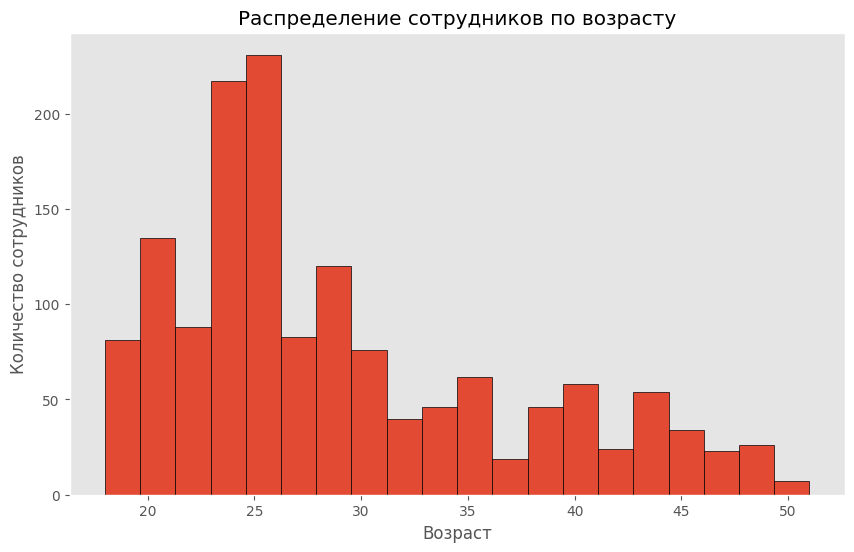

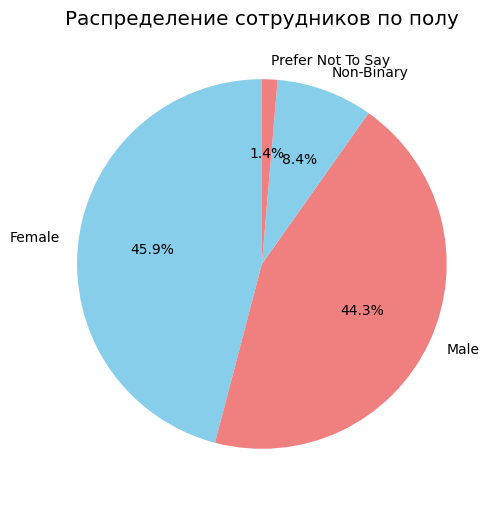

In [43]:
# Распределение по возрасту
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=20, edgecolor='black')
plt.title('Распределение сотрудников по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество сотрудников')
plt.grid(False)
plt.show()

# Распределение по полу
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Распределение сотрудников по полу')
plt.ylabel('')  # Убираем метку оси
plt.show()

Основная возрастная группа сотрудников: Большинство сотрудников компании находятся в возрасте от 20 до 30 лет, с пиком на 25-26 годах. Это указывает на то, что в компании преобладают молодые сотрудники.

Меньшая доля сотрудников старше 35 лет: После 30 лет количество сотрудников начинает значительно снижаться, и в возрастной группе старше 40 лет их существенно меньше.

Молодой кадровый состав: Вероятно, компания нанимает большое количество молодых специалистов или сотрудников с небольшим опытом работы. Это может быть связано с политикой найма или структурой карьерного роста в компании.

Возрастное распределение: Отсутствие сотрудников старше 50 лет может говорить о специфике компании, например, о том, что она привлекает в основном молодых людей, либо о том, что сотрудники с возрастом покидают компанию.


Примерное равенство полов: В компании наблюдается практически равное распределение между мужчинами (44.3%) и женщинами (45.9%). Это указывает на сбалансированный гендерный состав сотрудников, что может свидетельствовать о равенстве возможностей при найме и продвижении по службе.

Малая доля сотрудников, относящих себя к другим категориям:

Non-Binary: 8.4% сотрудников идентифицируют себя как небинарные. Это достаточно значительный процент, который указывает на инклюзивность компании.

Prefer Not to Say: 1.4% сотрудников предпочли не указывать свой пол, что также важно учитывать в контексте уважения к конфиденциальности и личным предпочтениям сотрудников.

Инклюзивность: Наличие небинарных сотрудников и тех, кто предпочитает не указывать пол, говорит о том, что компания, возможно, придерживается инклюзивных практик и создает безопасную и комфортную рабочую среду для всех сотрудников вне зависимости от гендерной идентичности.

## 2. Анализ зарплат по полу

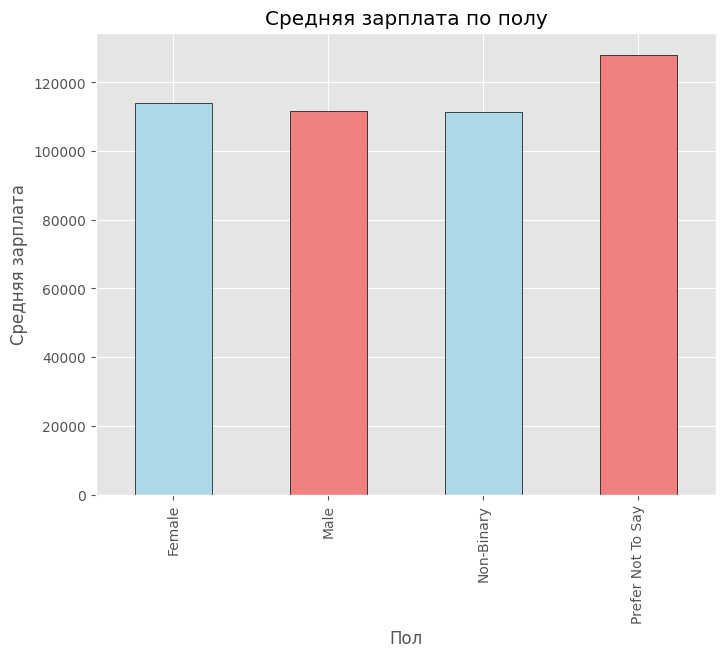

In [44]:
# Средняя зарплата по полу
salary_by_gender = df.groupby('Gender')['Salary'].mean()

plt.figure(figsize=(8, 6))
salary_by_gender.plot(kind='bar', color=['lightblue', 'lightcoral'], edgecolor='black')
plt.title('Средняя зарплата по полу')
plt.xlabel('Пол')
plt.ylabel('Средняя зарплата')
plt.show()

Средняя зарплата сотрудников мужского и женского пола практически одинакова: Средние зарплаты для женщин и мужчин находятся на очень близком уровне, что говорит о том, что в компании может быть соблюдено гендерное равенство в оплате труда.

Небинарные сотрудники: Средняя зарплата небинарных сотрудников также не сильно отличается от зарплат мужчин и женщин, что свидетельствует о равных возможностях для всех сотрудников вне зависимости от их гендерной идентичности.

Высокая зарплата у тех, кто предпочел не указывать пол: Сотрудники, которые предпочли не указывать свой пол (Prefer Not to Say), имеют наибольшую среднюю зарплату. Это может быть связано с тем, что в эту категорию могут попасть сотрудники на более высоких позициях или с более значительным опытом работы.

## 3. Распределение сотрудников по этнической принадлежности

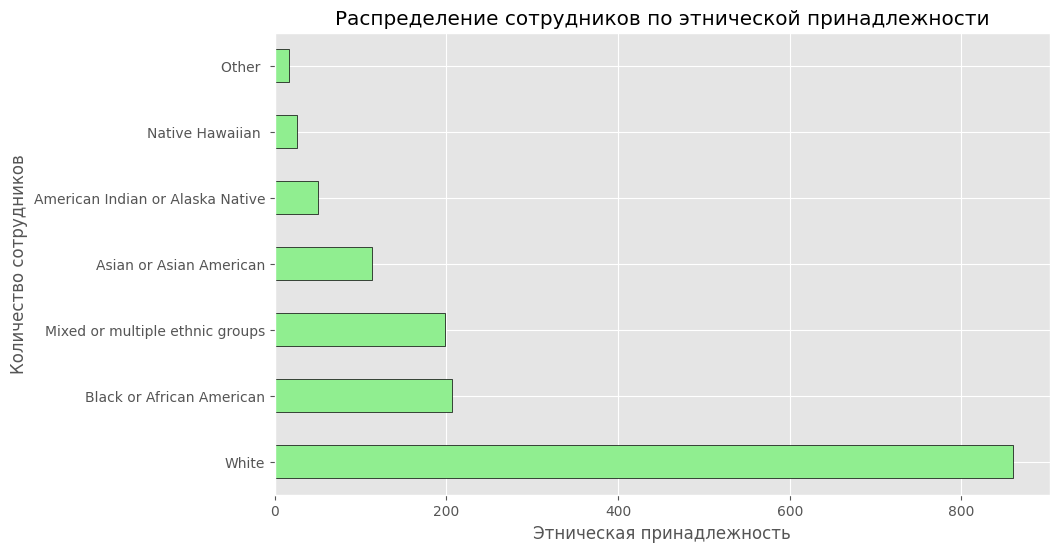

In [45]:
# Распределение по этнической принадлежности
ethnicity_counts = df['Ethnicity'].value_counts()

plt.figure(figsize=(10, 6))
ethnicity_counts.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Распределение сотрудников по этнической принадлежности')
plt.xlabel('Этническая принадлежность')
plt.ylabel('Количество сотрудников')
plt.show()

Преобладание белых сотрудников: Основную долю сотрудников (более 800 человек) составляют люди, относящие себя к этнической группе «White» (белые). Это наиболее значимая группа среди всех этнических категорий.

Значительное количество сотрудников из других этнических групп:

Сотрудники афроамериканского происхождения («Black or African American») и сотрудники, принадлежащие к смешанным или множественным этническим группам («Mixed or multiple ethnic groups»), составляют примерно одинаковые группы, каждая с количеством сотрудников около 200.

Сотрудники азиатского происхождения («Asian or Asian American») занимают третье место после афроамериканцев и смешанных этнических групп, но их количество меньше.

Меньшие группы сотрудников других этнических категорий:

Очень незначительное количество сотрудников из групп «American Indian or Alaska Native», «Native Hawaiian», и «Other». Это может указывать на меньшую представленность этих этнических категорий в компании.

## 4. Анализ зависимости между семейным положением и зарплатой

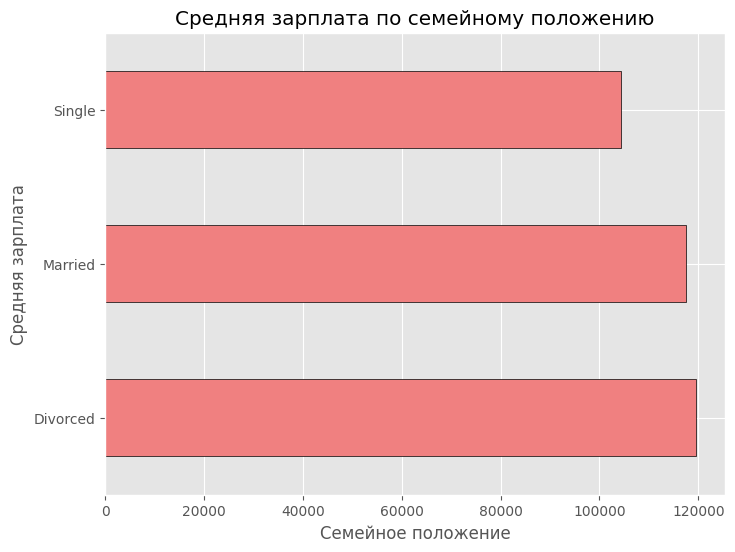

In [46]:
# Средняя зарплата по семейному положению
salary_by_marital_status = df.groupby('MaritalStatus')['Salary'].mean()

plt.figure(figsize=(8, 6))
salary_by_marital_status.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Средняя зарплата по семейному положению')
plt.xlabel('Семейное положение')
plt.ylabel('Средняя зарплата')
plt.show()


Однородность зарплат: Независимо от семейного положения (одинокие, женатые или разведенные), средняя зарплата среди этих категорий находится на приблизительно одинаковом уровне. Это указывает на то, что семейное положение не является значительным фактором, влияющим на уровень заработной платы в компании.

Незначительные различия:

Женатые сотрудники и разведенные сотрудники имеют немного более высокую среднюю зарплату по сравнению с одинокими, но эти различия несущественны.
Возможно, более высокая средняя зарплата у женатых и разведенных сотрудников может быть связана с тем, что они могут занимать более высокие должности или иметь больший опыт работы.

## 5. Влияние удаленности от дома на зарплату

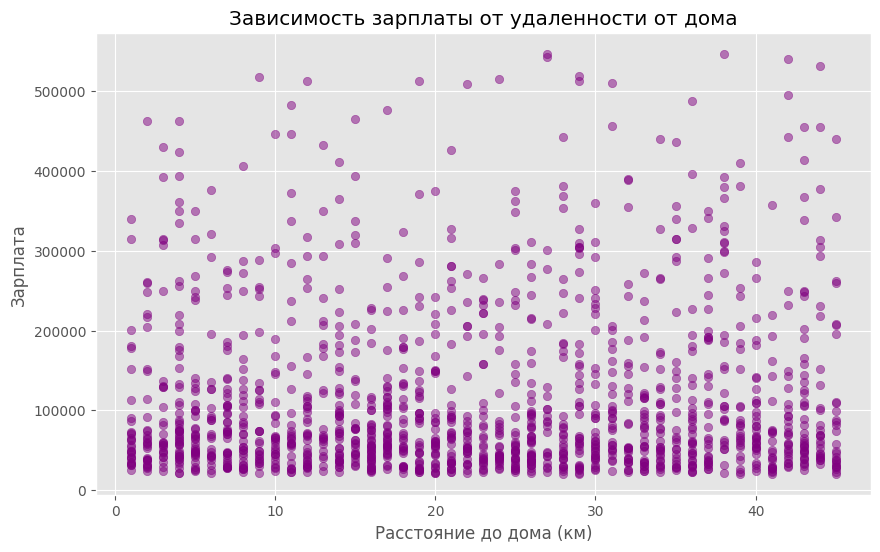

In [47]:
# Визуализация зависимости зарплаты от расстояния до работы
plt.figure(figsize=(10, 6))
plt.scatter(df['DistanceFromHome (KM)'], df['Salary'], alpha=0.5, color='purple')
plt.title('Зависимость зарплаты от удаленности от дома')
plt.xlabel('Расстояние до дома (км)')
plt.ylabel('Зарплата')
plt.grid(True)
plt.show()


Отсутствие явной корреляции: На графике не видно явной связи между расстоянием до дома и уровнем зарплаты. Сотрудники, проживающие на разном расстоянии (от 0 до 40 км), могут получать как низкие, так и высокие зарплаты, без какого-либо заметного тренда. Это говорит о том, что фактор удаленности от дома, скорее всего, не оказывает влияния на размер зарплаты.

Зарплаты распределены по всему диапазону расстояний: Независимо от того, насколько далеко сотрудник живет от работы, его зарплата может находиться в широком диапазоне — от 50 000 до более чем 500 000. Это подтверждает отсутствие связи между этими переменными.

Большая концентрация зарплат на уровне около 100 000: Больше всего точек наблюдается на уровне зарплаты около 100 000, что может указывать на то, что значительная часть сотрудников имеет примерно одинаковую зарплату независимо от расстояния до дома.

## 6.  Анализ взаимосвязи между возрастом и стажем работы

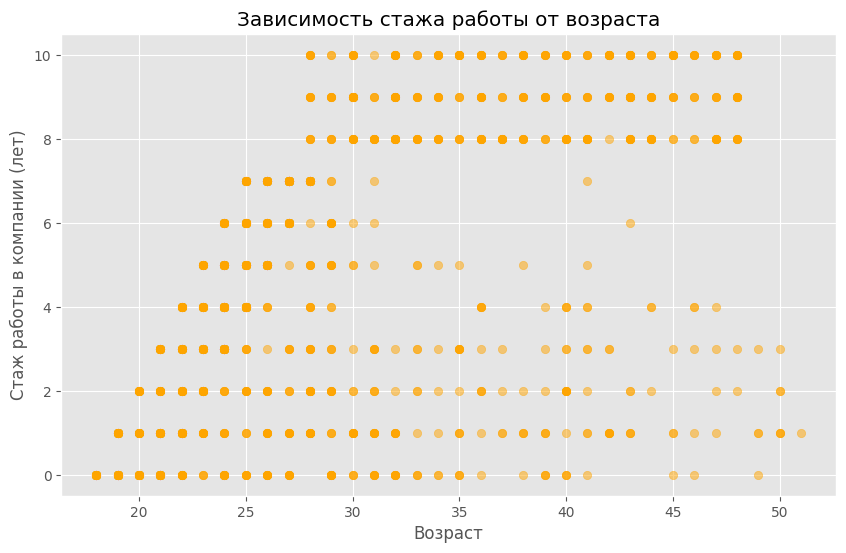

In [48]:
# Визуализация зависимости возраста и стажа работы в компании
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['YearsAtCompany'], alpha=0.5, color='orange')
plt.title('Зависимость стажа работы от возраста')
plt.xlabel('Возраст')
plt.ylabel('Стаж работы в компании (лет)')
plt.grid(True)
plt.show()


Прямая зависимость стажа от возраста: Естественно, что сотрудники более старшего возраста, как правило, имеют больший стаж работы в компании. На графике это отражено увеличением количества точек по оси стажа для более взрослых сотрудников.

Группы сотрудников с максимальным стажем (10 лет): Существует несколько сотрудников во всех возрастных категориях, которые достигли максимального стажа работы (10 лет). Это указывает на то, что в компании есть люди, которые долгое время остаются на одном месте, независимо от их возраста.

Молодые сотрудники с разным стажем: На графике можно увидеть, что многие молодые сотрудники (возраст около 25-30 лет) имеют небольшой стаж работы (менее 2 лет). Это говорит о том, что компания нанимает много молодых сотрудников, которые недавно начали свою карьеру.

Разброс стажа среди возрастных категорий: Сотрудники в возрасте около 30-40 лет имеют разные уровни стажа работы в компании. Это может означать как приток новых сотрудников в этой возрастной группе, так и тех, кто продолжает работать в компании уже несколько лет.

Ограниченное количество значений для возможностей обучения: Возможно, в наборе данных лишь несколько категорий для показателя TrainingOpportunitiesWithinYear, например, значения 1, 2 и 3. Это создает ситуацию, в которой данные на графике не показывают большую вариативность.

Проблемы с вариативностью данных: Возможно, что данные содержат мало уникальных значений, из-за чего точки на графике распределены так равномерно. Это может указывать на то, что количество обучающих возможностей не сильно варьируется среди сотрудников, и, возможно, эта переменная не имеет большого влияния на количество лет с момента последнего повышения.

## 7. Анализ вовлеченности сотрудников

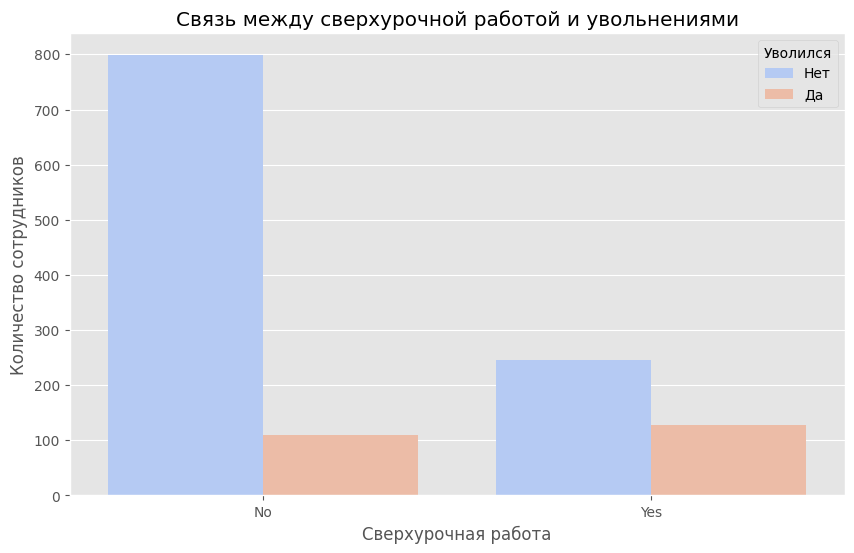

In [66]:
# Выбираем релевантные переменные для анализа
features = ['OverTime', 'JobSatisfaction', 'WorkLifeBalance', 'ManagerRating', 'SelfRating', 'Attrition']

# Удаляем строки с пропущенными значениями
df_clean = df[features].dropna()

# Шаг 2: Анализ влияния сверхурочной работы на вовлеченность
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='OverTime', hue='Attrition', palette='coolwarm')
plt.title('Связь между сверхурочной работой и увольнениями')
plt.xlabel('Сверхурочная работа')
plt.ylabel('Количество сотрудников')
plt.legend(title='Уволился', loc='upper right', labels=['Нет', 'Да'])
plt.show()

Сотрудники, не работающие сверхурочно, реже увольняются:

Большинство сотрудников, которые не работали сверхурочно, остались в компании. Это указывает на более стабильные условия работы для тех, кто имеет сбалансированное количество рабочих часов.
Количество увольнений среди сотрудников, которые не работали сверхурочно, относительно невелико.
Сотрудники, работающие сверхурочно, имеют более высокий уровень текучести:

Среди тех, кто работал сверхурочно, число увольнений выше, чем среди тех, кто не работал сверхурочно. Это говорит о том, что работа сверхурочно может быть фактором, способствующим текучести кадров.
Вероятно, сотрудники, которые вынуждены регулярно перерабатывать, могут испытывать стресс или неудовлетворенность работой, что повышает риск их ухода.
Возможные интерпретации и рекомендации:
Негативное влияние сверхурочной работы на удержание сотрудников:

Сверхурочная работа, похоже, повышает вероятность увольнения сотрудников. Это может быть связано с ухудшением баланса работы и личной жизни, усталостью или выгоранием.
Разработка мер по снижению количества сверхурочной работы:

Оптимизация рабочих процессов, чтобы уменьшить необходимость сверхурочной работы.
Введение программ поддержки сотрудников, таких как компенсация за сверхурочную работу или гибкий график, чтобы смягчить негативное воздействие.

<ipython-input-67-b65dce29723e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='WorkLifeBalance', y='JobSatisfaction', palette='viridis')


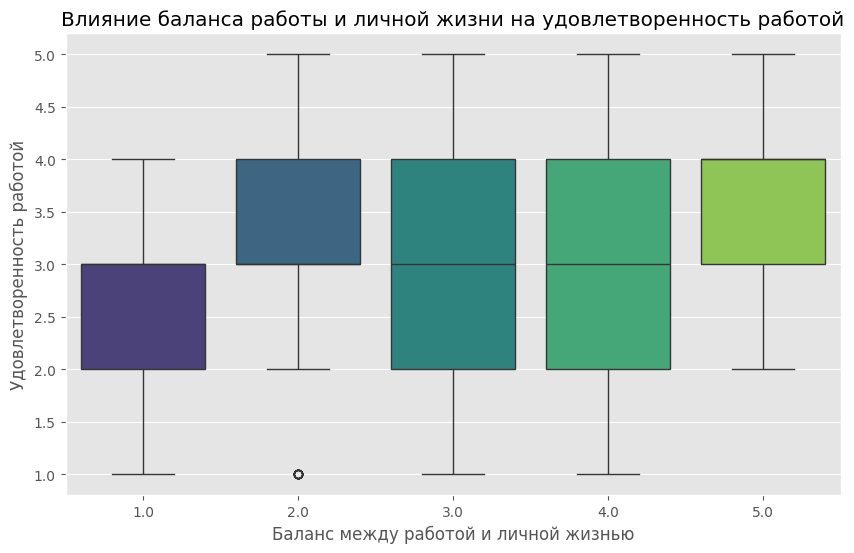

In [67]:
# Шаг 3: Влияние баланса работы и личной жизни на удовлетворенность работой
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='WorkLifeBalance', y='JobSatisfaction', palette='viridis')
plt.title('Влияние баланса работы и личной жизни на удовлетворенность работой')
plt.xlabel('Баланс между работой и личной жизнью')
plt.ylabel('Удовлетворенность работой')
plt.show()

Чем лучше баланс работы и личной жизни, тем выше удовлетворенность:

Наблюдается явная положительная корреляция: чем выше уровень баланса работы и личной жизни (значения от 1 до 5), тем выше средняя удовлетворенность работой.
Уровень 1 (наименее сбалансированный) имеет самые низкие медианные значения удовлетворенности, что означает, что сотрудники с наименее сбалансированным графиком часто менее довольны своей работой.
Уровни 3-5 демонстрируют более высокую медиану удовлетворенности, что говорит о том, что сотрудники с более сбалансированным графиком работы чаще всего довольны своей позицией.
Большое распределение удовлетворенности для низкого баланса:

У сотрудников с балансом уровня 1 наблюдается большее распределение значений удовлетворенности — это может указывать на разные личные ситуации или разное восприятие условий работы.
Сотрудники, которые имеют более низкий баланс, также демонстрируют более низкую согласованность в оценках удовлетворенности, что может указывать на множество негативных факторов, влияющих на их работу.
Уровень 4 и 5 показывают наибольшую стабильность в удовлетворенности:

На уровнях 4 и 5 видны самые высокие медианные оценки, а также меньшее распределение, что говорит о стабильной и высокой удовлетворенности сотрудников, у которых баланс работы и личной жизни хорошо организован.
Возможные интерпретации и рекомендации:
Баланс работы и личной жизни — ключевой фактор удовлетворенности:

Сотрудники с высоким балансом работы и личной жизни (уровни 4 и 5) имеют более высокую удовлетворенность. Это указывает на необходимость разработать программы для повышения этого баланса.
Гибкий график работы или возможности удаленной работы могут помочь улучшить баланс, особенно для тех сотрудников, которые часто работают сверхурочно.
Фокус на сотрудников с низким уровнем баланса:

Стоит обратить внимание на сотрудников с низким уровнем баланса (уровень 1) и разработать инициативы по улучшению их рабочего времени, возможно, пересмотр обязанностей или перераспределение задач, чтобы уменьшить стресс и улучшить их удовлетворенность.
Улучшение корпоративной культуры:

Поддержка сотрудников в поиске баланса работы и личной жизни может привести к увеличению производительности, снижению текучести и повышению лояльности. Рекомендации могут включать предоставление ресурсов по управлению временем, организацию мероприятий для отдыха и восстановления, или стимулирование отпусков.

<ipython-input-69-c35caac598ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Attrition', y='JobSatisfaction', palette='coolwarm')


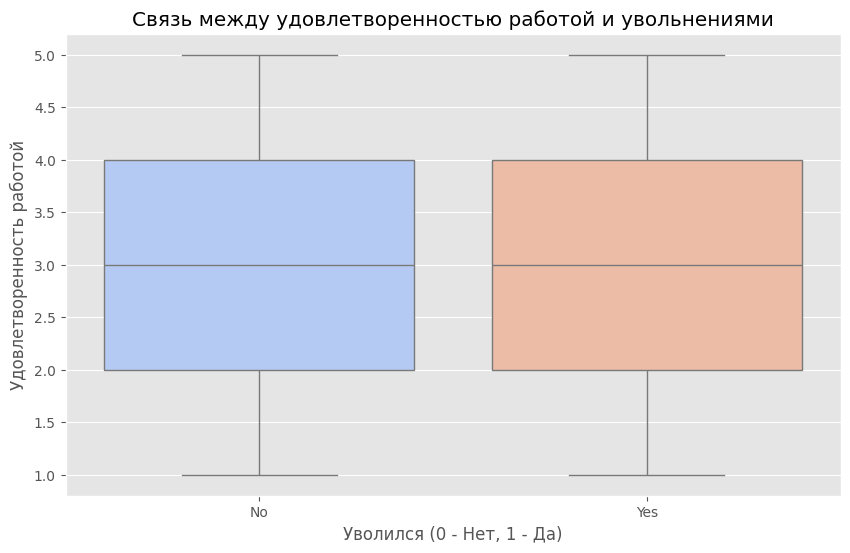

In [69]:
# Шаг 5: Анализ связи между удовлетворенностью и увольнениями
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Attrition', y='JobSatisfaction', palette='coolwarm')
plt.title('Связь между удовлетворенностью работой и увольнениями')
plt.xlabel('Уволился (0 - Нет, 1 - Да)')
plt.ylabel('Удовлетворенность работой')
plt.show()

Выводы из графика:
Медианная удовлетворенность ниже у уволившихся сотрудников:

Медиана удовлетворенности у сотрудников, которые покинули компанию (Yes), ниже по сравнению с медианой у тех, кто остался (No).
Это показывает, что сотрудники с низкой удовлетворенностью более склонны к увольнению, что логично и соответствует общим ожиданиям.
Большее распределение удовлетворенности среди тех, кто остался:

У сотрудников, которые остались в компании, наблюдается более широкое распределение удовлетворенности — от уровня "очень неудовлетворен" до уровня "очень удовлетворен". Это может означать, что даже некоторые сотрудники с низкой удовлетворенностью решили остаться по другим причинам (например, финансовым или из-за отсутствия альтернатив).
Высокое распределение среди тех, кто уволился:

Те сотрудники, которые уволились, имеют более узкий диапазон уровней удовлетворенности, но в целом направленность к более низким значениям.
Это указывает на то, что низкая удовлетворенность — важный фактор, влияющий на решение о покидании компании.
Возможные интерпретации и рекомендации:
Низкая удовлетворенность как ключевой фактор увольнений:

Низкая удовлетворенность работой является сильным предиктором увольнения. Сотрудники, недовольные своей работой, значительно чаще принимают решение покинуть компанию.
Следует уделить внимание улучшению условий и факторов, которые влияют на удовлетворенность, чтобы снизить текучесть кадров.
Фокус на группы с низкой удовлетворенностью:

Организация должна проводить опросы удовлетворенности и уделять больше внимания сотрудникам, которые демонстрируют низкие уровни удовлетворенности. Это могут быть регулярные беседы один-на-один с менеджерами, с целью понять причины недовольства.
Разработка планов действий для улучшения таких аспектов, как условия труда, компенсации, возможности карьерного роста и баланс работы и личной жизни.
Поддержка сотрудников с умеренной удовлетворенностью:

Сотрудники, которые остаются, несмотря на умеренный или низкий уровень удовлетворенности, могут быть ценным ресурсом для понимания, что удерживает сотрудников в компании. Возможно, есть значимые факторы, такие как социальные связи на работе, карьерные перспективы или бенефиты, которые помогают удержать их.

<ipython-input-70-eb5046f56b87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='OverTime', y='ManagerRating', palette='plasma')


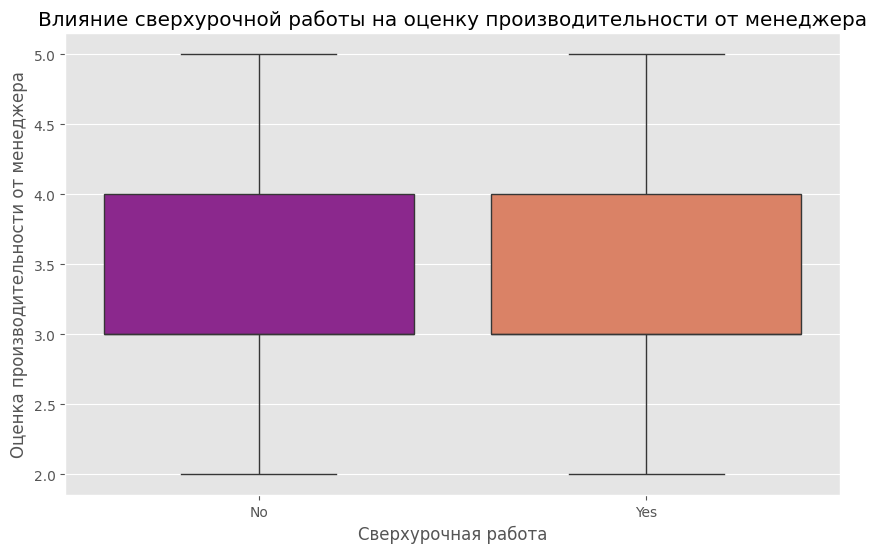

In [70]:
# Шаг 6: Влияние сверхурочной работы на производительность сотрудников
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='OverTime', y='ManagerRating', palette='plasma')
plt.title('Влияние сверхурочной работы на оценку производительности от менеджера')
plt.xlabel('Сверхурочная работа')
plt.ylabel('Оценка производительности от менеджера')
plt.show()

Выводы из графика:
Медианная оценка производительности одинаковая:

Медианные оценки производительности почти одинаковы как для тех, кто работал сверхурочно (Yes), так и для тех, кто не работал (No).
Это может говорить о том, что работа сверхурочно не является значимым фактором, влияющим на оценку производительности, по крайней мере с точки зрения менеджеров. Иными словами, сотрудники, которые работают сверхурочно, не обязательно показывают более высокий уровень производительности.
Большее распределение среди тех, кто работал сверхурочно:

Видно, что диапазон оценок для тех, кто работал сверхурочно, шире, чем для тех, кто не работал.
Это может означать, что среди сотрудников, работающих сверхурочно, есть как те, кто демонстрирует высокую производительность, так и те, чья производительность оценивается ниже. Возможно, переработка может оказывать как положительное, так и отрицательное влияние на сотрудников, в зависимости от личных качеств, уровня стресса и других факторов.
Похожие верхние границы оценок:

Верхние границы для обеих групп примерно одинаковы, что говорит о том, что менеджеры оценивают максимальную производительность сотрудников примерно одинаково, независимо от того, работают ли они сверхурочно.
Возможные интерпретации и рекомендации:
Сверхурочная работа не гарантирует высокую производительность:

Сверхурочная работа не приводит к систематическому улучшению оценок производительности, что может говорить о том, что переработки не всегда являются эффективным способом повышения продуктивности сотрудников.
Следует фокусироваться на эффективности работы в стандартное рабочее время, а не на увеличении продолжительности работы, так как это может не привести к росту производительности, а наоборот — вызывать выгорание.
Различие в диапазоне оценок:

Важно обратить внимание на большое распределение оценок среди сотрудников, работающих сверхурочно. Вполне возможно, что часть сотрудников перегружается и это негативно сказывается на их производительности.
Рассмотрите возможность предоставления дополнительных ресурсов или поддержки для тех, кто работает сверхурочно, чтобы минимизировать негативное влияние на производительность.
Анализ взаимосвязи со стрессом и удовлетворенностью:

Работа сверхурочно может быть связана с выгоранием и пониженной удовлетворенностью. Следует дополнительно проанализировать, как переработки влияют на уровень стресса и удовлетворенность сотрудников, а также как это отражается на текучести кадров.

## Анализ по отделам и географическому расположению

<ipython-input-72-79b6672e8b05>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Department', palette='viridis')


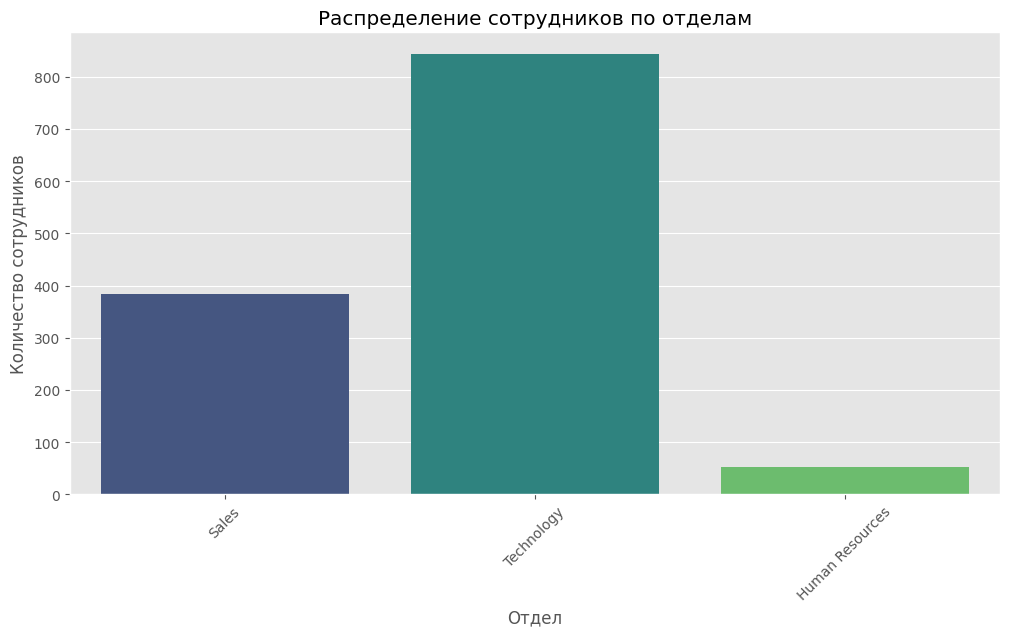

In [72]:
# Выбираем релевантные переменные для анализа
features = ['Department', 'State', 'JobSatisfaction', 'Attrition', 'ManagerRating', 'SelfRating']

# Удаляем строки с пропущенными значениями
df_clean = df[features].dropna()

# Шаг 2: Распределение сотрудников по отделам
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Department', palette='viridis')
plt.title('Распределение сотрудников по отделам')
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.show()

Явное доминирование отдела Technology:

На графике видно, что большая часть сотрудников работает в отделе Technology, с численностью более 800 человек.
Это может указывать на то, что основная деятельность компании сосредоточена в сфере технологий, что характерно для организаций, ориентированных на технические услуги или разработку продуктов.
Средний размер отдела Sales:

В отделе Sales работает значительно меньше сотрудников — около 400 человек. Это логично, так как технические компании обычно фокусируются на разработке и поддержке технологий, а продажи могут требовать меньшего количества сотрудников.
Маленький отдел Human Resources:

Наименьшее количество сотрудников работает в Human Resources (кадровом отделе). Это типично для большинства организаций, где отдел кадров меньше по численности и занимается административными функциями, такими как рекрутинг, управление персоналом и поддержка.
Возможные интерпретации и рекомендации:
Фокус на поддержке отдела Technology:

Так как большая часть сотрудников работает в Technology, важно обеспечить поддержку и ресурсы для этого отдела, чтобы поддерживать высокий уровень производительности и удовлетворенности.
Программы развития и обучения могут быть особенно важны для технических специалистов, чтобы они могли поддерживать и развивать необходимые навыки.
Оптимизация работы отдела Sales:

Отдел Sales, будучи меньше по численности, играет важную роль в генерировании дохода. Возможно, стоит анализировать, достаточно ли ресурсов у отдела для выполнения своих задач, и требуется ли расширение команды для достижения целей компании.
Усиление кадровой поддержки:

В условиях увеличения численности сотрудников в технологическом и торговом отделах может потребоваться усиление кадрового отдела для управления растущими потребностями в рекрутинге, обучении и поддержке сотрудников.
Рассмотреть увеличение численности кадрового отдела или предоставление дополнительных инструментов для автоматизации процессов управления персоналом.

<ipython-input-73-a6977e202bd9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='State', palette='magma')


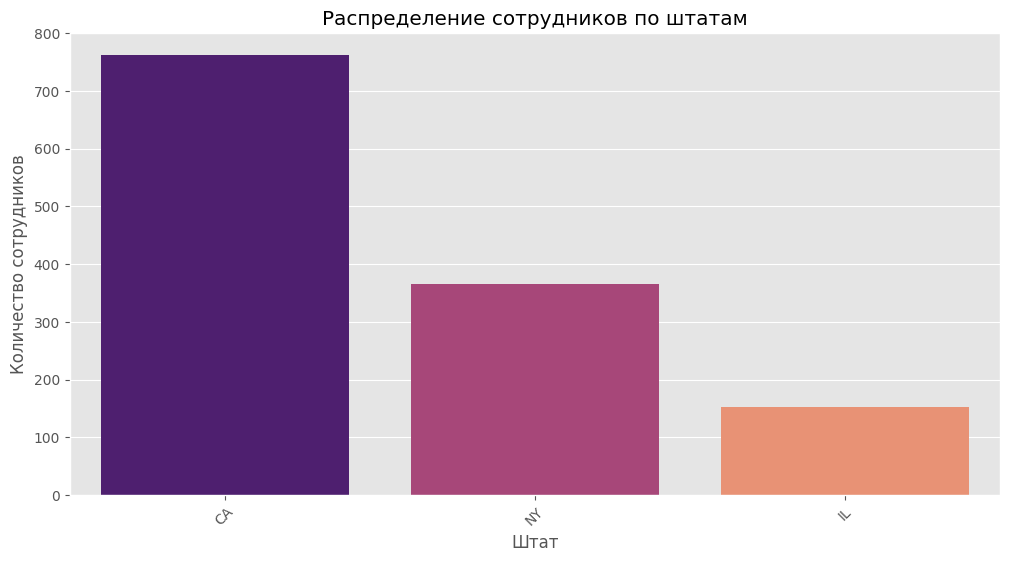

In [73]:
# Шаг 3: Распределение сотрудников по штатам
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='State', palette='magma')
plt.title('Распределение сотрудников по штатам')
plt.xlabel('Штат')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.show()

Доминирование штата CA:

Штат CA (Калифорния) имеет самое большое количество сотрудников, более 700 человек. Это может быть связано с тем, что компания имеет свои основные офисы в этом штате или потому что здесь сосредоточена большая часть её деятельности.
Такой большой фокус сотрудников в одном штате может также отражать предпочтение компании к близости к технологическим хабам (например, Кремниевая долина в Калифорнии).
Средний размер штата NY:

В штате NY (Нью-Йорк) работает значительно меньше сотрудников — примерно 400 человек.
Это может быть связано с тем, что компания ведет активную деятельность в этом штате, но этот регион не является основным местом сосредоточения всех сотрудников.
Малое количество сотрудников в штате TX:

В штате TX (Техас) работает меньше всего сотрудников — менее 200 человек.
Это может быть связано с меньшей необходимостью присутствия в этом регионе или наличием дополнительных офисов, которые обслуживают конкретные функции.
Возможные интерпретации и рекомендации:
Сосредоточенность на CA и управление ресурсами:

Значительная часть сотрудников находится в Калифорнии, что может быть стратегически оправдано, особенно если компания зависит от технологических хабов и инновационной экосистемы региона.
Тем не менее, сосредоточенность большого количества сотрудников в одном месте может создавать зависимость от специфики региона, такой как высокий уровень жизни и соответствующие затраты на персонал. Следует рассмотреть возможности для распределения сотрудников по другим регионам, чтобы снизить операционные риски и затраты.
Поддержка сотрудников в штате NY и расширение штата TX:

В штате Нью-Йорк средний размер представительства компании может указывать на значимость региона, например, для продаж или маркетинга. Следует поддерживать эти офисы, особенно с учетом разнообразия задач, которые они могут выполнять.
В Техасе количество сотрудников значительно меньше. Возможно, стоит рассмотреть возможности для расширения присутствия в Техасе из-за более низкой стоимости жизни и налоговых преимуществ, которые предлагает штат.
Географическая диверсификация для повышения устойчивости:

Распределение сотрудников по разным штатам помогает снизить риски, связанные с локальными событиями, такими как изменения в налогообложении или природные катастрофы.
Стоит рассмотреть возможность удаленной работы или расширения офиса в других штатах, что поможет не только сократить расходы, но и обеспечить доступ к более широкому пулу талантов.

<ipython-input-74-8fd8cc5d6321>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Department', y='JobSatisfaction', palette='coolwarm')


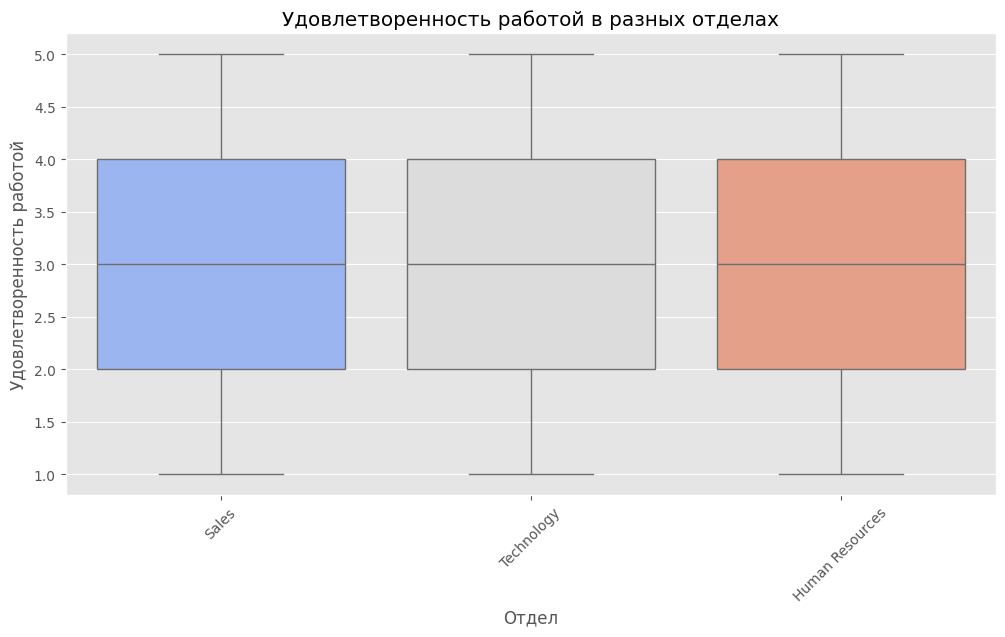

In [74]:
# Шаг 4: Удовлетворенность работой в разных отделах
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Department', y='JobSatisfaction', palette='coolwarm')
plt.title('Удовлетворенность работой в разных отделах')
plt.xlabel('Отдел')
plt.ylabel('Удовлетворенность работой')
plt.xticks(rotation=45)
plt.show()

Сравнительная медиана удовлетворенности:

Медианные значения удовлетворенности довольно схожи для всех трех отделов (Sales, Technology, Human Resources) и составляют примерно 3.0 балла. Это говорит о том, что в среднем сотрудники всех отделов оценивают свою удовлетворенность работой на одном уровне.
Разброс значений удовлетворенности:

Наибольший диапазон значений удовлетворенности наблюдается в отделе Sales. Это означает, что у сотрудников этого отдела значительно варьируется восприятие их работы — есть как очень довольные, так и крайне недовольные.
Технологический отдел (Technology) и отдел кадров (Human Resources) имеют схожий, более узкий диапазон. Это может означать, что в этих отделах сотрудники имеют более стабильное восприятие своей работы, но и те и другие в среднем не слишком высоко оценивают свою удовлетворенность.
Отсутствие явных лидеров по удовлетворенности:

График не показывает существенных различий между отделами с точки зрения медианы или верхнего уровня удовлетворенности. Таким образом, нет очевидного лидера, где сотрудники особенно довольны своей работой.
Возможные интерпретации и рекомендации:
Фокус на отдел Sales:

В отделе Sales наблюдается более широкий диапазон удовлетворенности, что может указывать на разнообразие задач или различное управление в этом отделе. Следует провести анализ на уровне команды или менеджеров, чтобы понять причины значительных различий.
Разнообразие в восприятии может быть вызвано разной нагрузкой, нехваткой ресурсов или различиями в менеджменте. Возможно, стоит рассмотреть стандартизацию процессов или внедрение программ по поддержке сотрудников.
Анализ внутренних факторов в отделах Technology и HR:

Несмотря на стабильные медианные значения, удовлетворенность в отделах Technology и HR также не является высокой. Стоит провести более глубокий анализ факторов, влияющих на удовлетворенность, таких как условия работы, возможности карьерного роста или баланс между работой и личной жизнью.
Возможно, стоит рассмотреть улучшение условий труда или повышение гибкости для сотрудников технологического и кадрового отделов, чтобы повысить их уровень удовлетворенности.
Общий подход к повышению удовлетворенности:

Поскольку уровень удовлетворенности в среднем составляет около 3 баллов (что можно считать средним или умеренным уровнем), компания могла бы рассмотреть инициативы по улучшению мотивации и вовлеченности сотрудников. Это может включать в себя программы обучения, признание заслуг сотрудников, возможности карьерного роста и гибкий график работы.

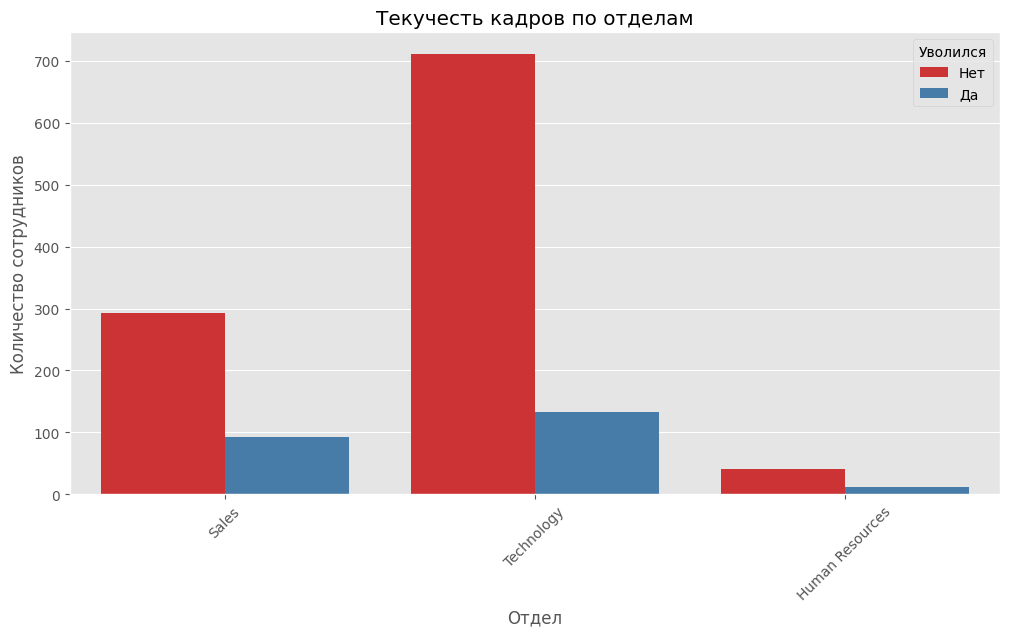

In [75]:
# Шаг 5: Текучесть кадров по отделам
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Department', hue='Attrition', palette='Set1')
plt.title('Текучесть кадров по отделам')
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.legend(title='Уволился', labels=['Нет', 'Да'])
plt.show()

Высокая текучесть в отделе Technology:

Отдел Technology демонстрирует наибольший уровень текучести — значительное количество сотрудников уволилось. Это может быть связано с:
Высокой нагрузкой или стрессом, которые испытывают сотрудники технического отдела.
Ограниченными возможностями карьерного роста или нехваткой мотивации, что подталкивает сотрудников искать другие возможности.
Возможно, высокие требования к производительности или давление сроков вызывают выгорание среди сотрудников.
Относительно высокая текучесть в отделе Sales:

В отделе Sales также наблюдается высокая текучесть, хотя и меньше, чем в отделе Technology.
Высокая текучесть в отделе продаж часто обусловлена:
Высокой конкуренцией и прессингом выполнения плана продаж, что приводит к демотивации сотрудников, которые не могут достичь поставленных целей.
Характер работы в отделе продаж часто сопряжён с переменчивыми условиями, что тоже способствует уходу сотрудников.
Низкая текучесть в отделе Human Resources:

Отдел Human Resources демонстрирует наименьшую текучесть среди всех отделов. Это может свидетельствовать о том, что сотрудники этого отдела чувствуют себя более комфортно, имеют меньше стресса и больше возможностей для роста и развития.
Возможно, сотрудники отдела кадров лучше осведомлены о возможностях внутри компании и имеют более четкое понимание карьерных перспектив.
Возможные интерпретации и рекомендации:
Работа с причинами высокой текучести в отделе Technology:

Высокий уровень текучести в отделе Technology требует серьезного анализа причин.
Рекомендации включают:
Проведение опросов удовлетворенности и вовлеченности сотрудников для выявления конкретных проблем.
Улучшение баланса между работой и личной жизнью, возможно, предоставление гибкого графика или дополнительных выходных для снижения стресса.
Внедрение программ менторства и карьерного роста, чтобы сотрудники видели свои перспективы внутри компании и были мотивированы продолжать работу.
Удержание сотрудников отдела Sales:

Сотрудники отдела продаж часто сталкиваются с высокими целями и стрессом. Рекомендации для снижения текучести включают:
Пересмотр целей и мотивации: Убедиться, что цели продаж реалистичны и достижимы, чтобы не вызывать демотивацию у сотрудников.
Введение мотивационных программ и поощрений для лучших сотрудников.
Проведение тренингов по развитию навыков продаж, что может помочь сотрудникам чувствовать себя увереннее в выполнении своих обязанностей.
Поддержание низкой текучести в отделе Human Resources:

Низкий уровень текучести в отделе кадров указывает на хорошую атмосферу. Важно сохранить текущую корпоративную культуру и возможности развития, которые есть в этом отделе.

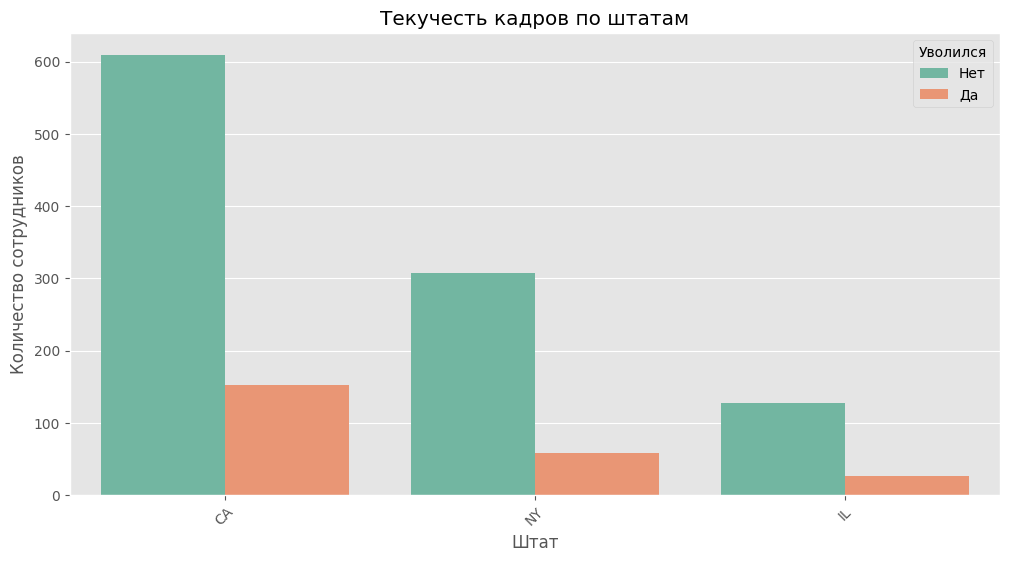

In [76]:
# Шаг 6: Текучесть кадров по штатам
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='State', hue='Attrition', palette='Set2')
plt.title('Текучесть кадров по штатам')
plt.xlabel('Штат')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.legend(title='Уволился', labels=['Нет', 'Да'])
plt.show()

Высокое количество сотрудников в штате CA и умеренная текучесть:

Штат CA (Калифорния) имеет наибольшее количество сотрудников, среди которых значительная часть продолжает работать. Количество уволившихся сотрудников также значительное, но относительно общего числа сотрудников в этом штате текучесть остается умеренной.
Вероятно, поскольку в Калифорнии сосредоточены ключевые офисы компании и основной технический персонал, текучесть здесь может быть связана с высокой нагрузкой и стрессом.
Относительно высокая текучесть в штате NY:

В штате NY (Нью-Йорк) текучесть кадров выше по сравнению с численностью сотрудников. Видно, что доля уволившихся сотрудников относительно общего числа работающих в Нью-Йорке выше, чем в Калифорнии.
Это может быть связано с условиями работы в этом регионе, требованиями к результатам или локальными факторами, такими как уровень стресса, высокая конкуренция и стоимость жизни.
Малое количество сотрудников в штате TX и низкая текучесть:

В штате TX (Техас) наблюдается самое малое количество сотрудников и сравнительно низкая текучесть. Уволившихся сотрудников значительно меньше по сравнению с общим числом работающих.
Это может свидетельствовать о хорошем качестве условий работы в Техасе, возможно, из-за меньшего стресса, более низкой стоимости жизни и лучших возможностей для поддержания баланса между работой и личной жизнью.
Возможные интерпретации и рекомендации:
Поддержка сотрудников в штате CA для снижения текучести:

Поскольку большая часть сотрудников находится в Калифорнии, важно уделить особое внимание поддержке и мотивации работников в этом штате, чтобы снизить текучесть.
Включение программ по улучшению баланса работы и личной жизни, предоставление дополнительных ресурсов для снижения стресса и поощрение гибкости могут помочь удержать сотрудников.
Разрешение проблем в штате NY:

Высокая текучесть в штате Нью-Йорк может быть вызвана несколькими факторами. Рекомендуется:
Провести опросы сотрудников в этом штате для выяснения причин увольнений.
Рассмотреть улучшение условий труда, таких как гибкость графика работы, дополнительные поощрения для сотрудников, повышение заработной платы, чтобы компенсировать высокие расходы на жизнь.
Расширение присутствия в штате TX:

В Техасе наблюдается хорошая удерживаемость сотрудников при относительно небольшой численности персонала. Это может быть хорошей возможностью для расширения присутствия компании в этом штате, поскольку здесь возможно обеспечить стабильное удержание сотрудников при сравнительно низких расходах.

<ipython-input-78-b0d584d5bf69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Department', y='ManagerRating', palette='viridis')


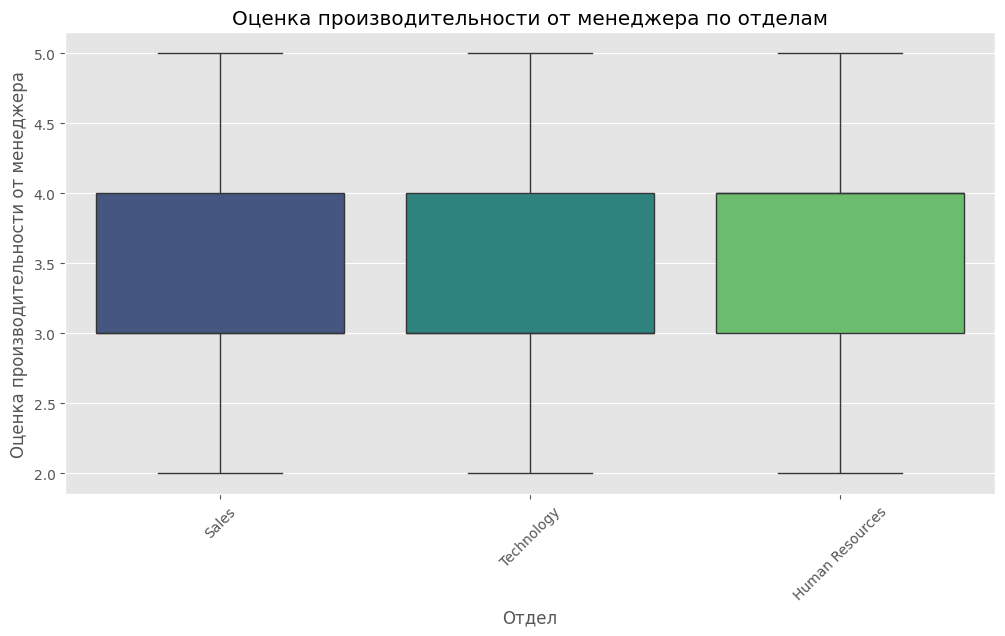

In [78]:
# Шаг 7: Оценка производительности по отделам
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Department', y='ManagerRating', palette='viridis')
plt.title('Оценка производительности от менеджера по отделам')
plt.xlabel('Отдел')
plt.ylabel('Оценка производительности от менеджера')
plt.xticks(rotation=45)
plt.show()

Сравнительно одинаковая медиана для всех отделов:

Медианные оценки производительности от менеджера примерно одинаковы для всех трех отделов (Sales, Technology, Human Resources). Это означает, что в среднем производительность сотрудников оценивается на одном уровне независимо от отдела.
Разброс оценок производительности:

Все отделы имеют широкий диапазон оценок производительности от 2.0 до 5.0, что означает, что внутри каждого отдела есть как сотрудники с низкими оценками, так и сотрудники с очень высокими оценками.
Отдел Sales показывает немного больший разброс, что может указывать на различия в результативности внутри отдела продаж — возможно, в зависимости от выполнения плана продаж или индивидуальных показателей сотрудников.
Похожее распределение в отделах Technology и Human Resources:

В отделах Technology и Human Resources медиана и разброс значений практически идентичны. Это может говорить о стабильной производительности, где нет больших отклонений, но также и о том, что менеджеры оценивают сотрудников довольно схожим образом.
Возможные интерпретации и рекомендации:
Анализ производительности в отделе Sales:

В отделе Sales наблюдается немного больший разброс в оценках производительности. Это может быть связано с различиями в выполнении поставленных целей или личными характеристиками сотрудников, такими как навыки продаж, стрессоустойчивость или опыт.
Рекомендуется провести анализ факторов, которые влияют на производительность сотрудников в отделе продаж. Это может помочь выявить тех, кто нуждается в дополнительной поддержке или обучении.
Поддержка сотрудников с низкими оценками производительности:

Во всех отделах есть сотрудники с низкими оценками производительности (в диапазоне 2.0–3.0). Рекомендуется разработать программы поддержки и обучения для таких сотрудников, чтобы помочь им улучшить свои результаты.
Например, проведение тренингов по улучшению ключевых навыков, индивидуальные планы развития или коучинговые сессии с менеджером могут оказаться полезными для повышения уровня производительности.
Усреднение оценок и влияние на мотивацию:

Похожесть медианных оценок по всем отделам может указывать на усредненный подход к оценке. Возможно, менеджерам следует более тщательно подходить к оценке результатов сотрудников, чтобы не терять мотивацию у лучших работников и не оставлять без внимания тех, кто нуждается в улучшении.
Введение четких критериев оценки производительности и регулярная обратная связь могут помочь сделать процесс оценки более прозрачным и мотивирующим для всех сотрудников.

<ipython-input-79-04fa5eaa8e8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='State', y='ManagerRating', palette='plasma')


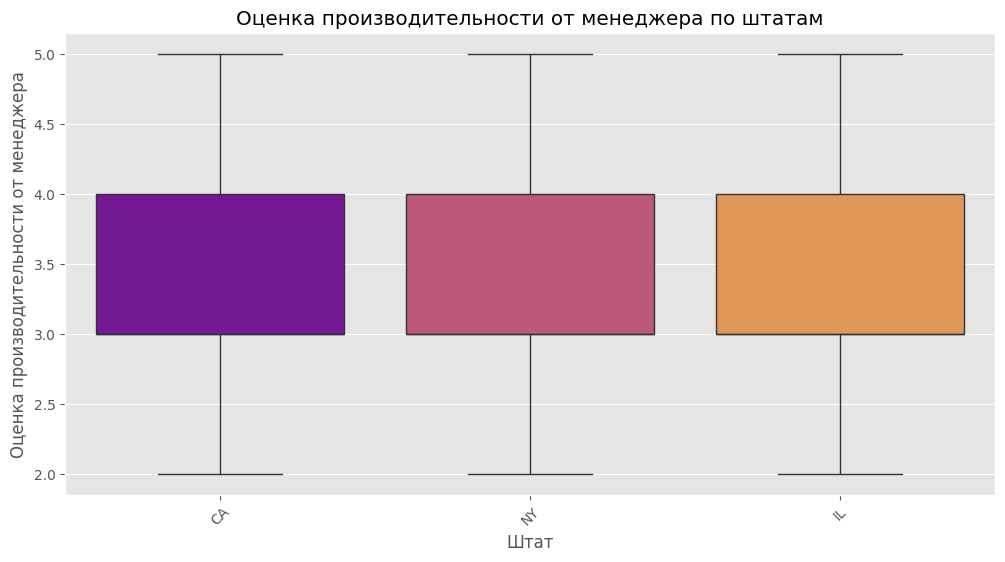

In [79]:
# Шаг 8: Оценка производительности по штатам
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='State', y='ManagerRating', palette='plasma')
plt.title('Оценка производительности от менеджера по штатам')
plt.xlabel('Штат')
plt.ylabel('Оценка производительности от менеджера')
plt.xticks(rotation=45)
plt.show()

Сравнительно одинаковые медианные оценки:

Медианные значения оценок производительности примерно одинаковы для всех трех штатов (CA, NY, TX) и составляют около 3.5. Это говорит о том, что в среднем сотрудники всех трех штатов оцениваются одинаково менеджерами.
Разброс оценок производительности в каждом штате:

Все три штата имеют похожий диапазон оценок производительности, начиная от 2.0 до 5.0. Это указывает на наличие как низкооцененных, так и высокоэффективных сотрудников в каждом из штатов.
Штат CA (Калифорния) показывает чуть больший разброс оценок, что может свидетельствовать о более разнообразном уровне квалификации сотрудников или различных командах с разной динамикой работы.
Медианные оценки в NY и TX чуть ниже:

Хотя в целом разброс и медианные значения похожи, можно заметить, что медианные значения в штатах NY и TX немного ниже по сравнению с Калифорнией, что может говорить о необходимости дополнительной поддержки или улучшения производительности в этих регионах.
Возможные интерпретации и рекомендации:
Необходимость поддержки в штатах NY и TX:

Немного более низкие медианные оценки в Нью-Йорке и Техасе могут указывать на необходимость дополнительных ресурсов для повышения производительности. Это могут быть программы обучения или меры по улучшению мотивации сотрудников.
Возможно, стоит проанализировать, какие факторы сдерживают производительность в этих штатах, например, баланс работы и личной жизни, доступ к необходимым ресурсам или взаимодействие с менеджерами.
Широкий диапазон в штате CA:

Калифорния демонстрирует широкий разброс оценок, что может означать значительные различия между командами или индивидуальными уровнями производительности. Важно провести анализ производительности на уровне команд, чтобы понять, где находятся самые сильные и слабые звенья.
Возможно, стоит провести дополнительную коучинговую работу с менеджерами, чтобы поддержать более слабые команды и обеспечить равномерное развитие сотрудников.
Поддержка лучших сотрудников:

Поскольку все три штата имеют сотрудников с высокими оценками (ближе к 5.0), важно обеспечить, чтобы эти высокоэффективные сотрудники оставались мотивированными. Это могут быть меры поощрения, признания заслуг, либо предоставление им возможностей карьерного роста.

## Анализ эффективности менеджеров

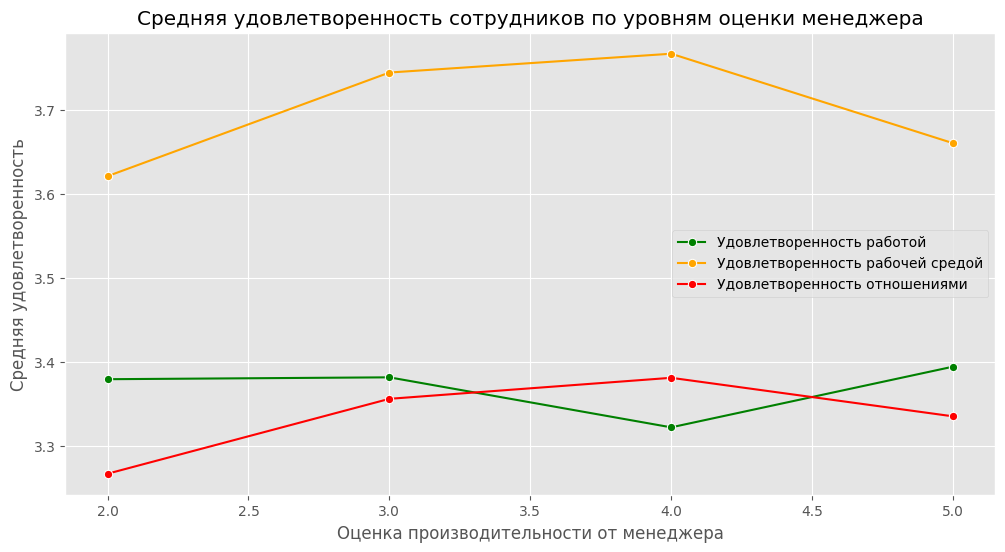

In [82]:
# Шаг 3: Средняя удовлетворенность сотрудников по уровням оценки менеджера
avg_satisfaction = df_clean.groupby('ManagerRating')[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_satisfaction, x='ManagerRating', y='JobSatisfaction', marker='o', label='Удовлетворенность работой', color='green')
sns.lineplot(data=avg_satisfaction, x='ManagerRating', y='EnvironmentSatisfaction', marker='o', label='Удовлетворенность рабочей средой', color='orange')
sns.lineplot(data=avg_satisfaction, x='ManagerRating', y='RelationshipSatisfaction', marker='o', label='Удовлетворенность отношениями', color='red')
plt.title('Средняя удовлетворенность сотрудников по уровням оценки менеджера')
plt.xlabel('Оценка производительности от менеджера')
plt.ylabel('Средняя удовлетворенность')
plt.legend()
plt.show()

Удовлетворенность рабочей средой растет с увеличением оценки, но затем падает:

Видно, что удовлетворенность рабочей средой (оранжевая линия) повышается с оценками производительности от менеджера до оценки 4.0, затем начинает снижаться при максимальной оценке (5.0).
Это может говорить о том, что сотрудники, которые получают высокие оценки (в районе 4.0), имеют лучшие условия труда, что, в свою очередь, способствует повышению удовлетворенности. Однако на уровне 5.0 наблюдается снижение, что может быть связано с высоким уровнем ожиданий и, возможно, стрессом из-за давления и повышенных требований.
Удовлетворенность отношениями не показывает значительного роста:

Удовлетворенность отношениями (красная линия) не показывает существенного увеличения по мере роста оценки производительности от менеджера. Она растет вначале, достигая максимума при 3.0, и затем остается практически неизменной или снижается.
Это может свидетельствовать о том, что высокая оценка производительности не обязательно коррелирует с хорошими отношениями на работе. Возможно, менеджеры ориентируются больше на выполнение задач, а не на создание хороших взаимоотношений в команде.
Удовлетворенность работой стабильно низкая:

Удовлетворенность работой (зеленая линия) остаётся почти неизменной и не показывает значительного роста или падения в зависимости от оценки менеджера, что может говорить о том, что сами по себе оценки менеджера не влияют на то, насколько сотрудники довольны своей работой.
Это может указывать на необходимость улучшения в других аспектах, таких как возможности карьерного роста, наличие обратной связи или понимание личных целей сотрудников.
Возможные интерпретации и рекомендации:
Развитие поддерживающей рабочей среды:

Так как удовлетворенность рабочей средой растет до оценки 4.0, компания могла бы обратить внимание на то, что именно способствует такому росту (например, возможности для обучения, поддержка от менеджера, доступ к ресурсам). Эти факторы следует распространять на другие команды и менеджеров.
Снижение на уровне 5.0 может говорить о выгорании сотрудников, получающих максимальные оценки. Необходимо предоставить больше поддержки и гибкости таким сотрудникам, чтобы снизить нагрузку и стресс.
Работа над взаимоотношениями в команде:

Так как удовлетворенность отношениями не повышается значительно по мере роста оценки, это может означать, что менеджерам нужно уделять больше внимания взаимодействию и коммуникации.
Компания может внедрить тренинги по улучшению навыков общения и лидерства для менеджеров, чтобы помочь им лучше поддерживать положительную атмосферу в команде.
Фокус на удовлетворенность работой:

Поскольку удовлетворенность работой не изменяется с ростом оценки, это сигнал о необходимости улучшения других аспектов, таких как прозрачность карьерного роста, возможности для личного и профессионального развития.
Введение программ наставничества, карьерных дорожек и регулярного предоставления обратной связи может способствовать росту удовлетворенности.

# 3. Анализ производительности и удовлетворенности сотрудников

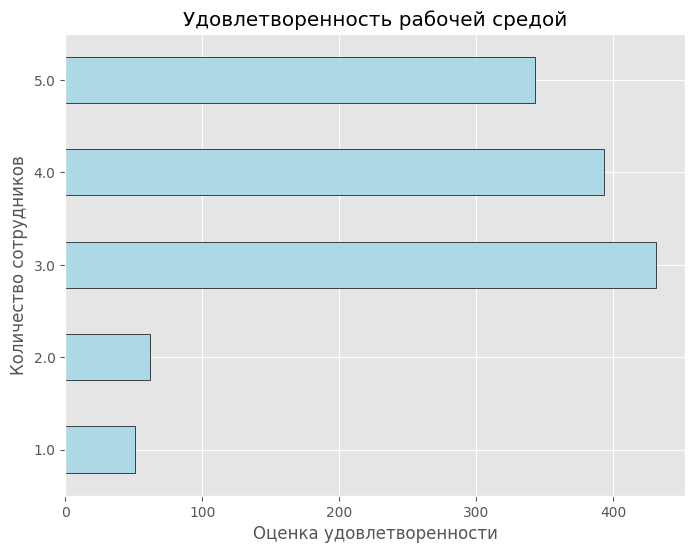

In [49]:
# Распределение по уровню удовлетворенности рабочей средой
plt.figure(figsize=(8, 6))
df['EnvironmentSatisfaction'].value_counts().sort_index().plot(kind='barh', color='lightblue', edgecolor='black')
plt.title('Удовлетворенность рабочей средой')
plt.xlabel('Оценка удовлетворенности')
plt.ylabel('Количество сотрудников')
plt.show()

Большая часть сотрудников оценивает удовлетворенность рабочей средой на уровне 3 и выше:

Оценка удовлетворенности "3" преобладает (около 450 сотрудников), что означает, что большинство сотрудников оценивают свою рабочую среду как "среднюю".
Достаточное количество сотрудников оценивает удовлетворенность на уровне "4" и "5", что говорит о том, что почти половина сотрудников довольны или очень довольны условиями работы.
Меньшее количество сотрудников с низкой оценкой:

Очень мало сотрудников оценивают рабочую среду на уровне "1" и "2", что говорит о том, что условия работы в целом считаются приемлемыми для большинства сотрудников.
Возможные зоны улучшения:

Несмотря на то, что значительное количество сотрудников оценивают рабочую среду на уровне "3" и выше, компания может рассмотреть возможности для улучшения условий труда, чтобы повысить удовлетворенность до уровня "5" у большего числа сотрудников.

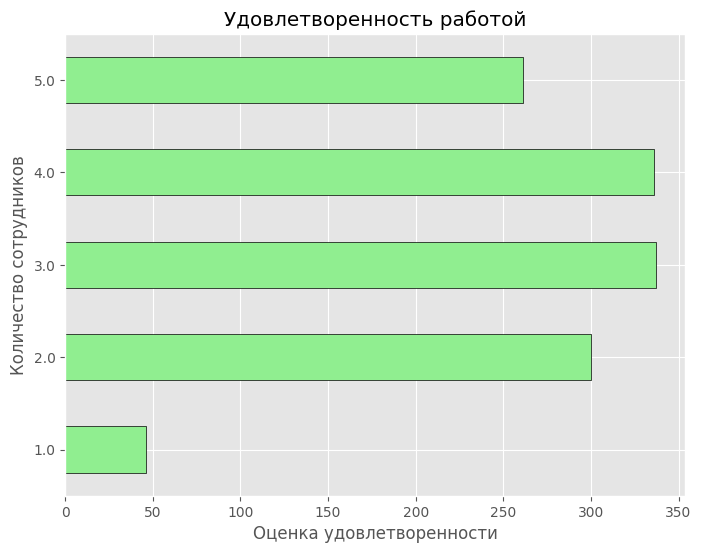

In [50]:
# Распределение по уровню удовлетворенности работой
plt.figure(figsize=(8, 6))
df['JobSatisfaction'].value_counts().sort_index().plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Удовлетворенность работой')
plt.xlabel('Оценка удовлетворенности')
plt.ylabel('Количество сотрудников')
plt.show()

Большая часть сотрудников оценивает удовлетворенность на уровне "3" и выше:

Оценки "3", "4", и "5" доминируют, что указывает на то, что большинство сотрудников довольны своей работой. Оценка "3" является самой частой (более 300 сотрудников), что говорит о среднем уровне удовлетворенности.
Значительное количество сотрудников также оценивают свою работу на "4" и "5", что свидетельствует о достаточно высоком уровне удовлетворенности.

Небольшая доля сотрудников с низкой удовлетворенностью:

Оценки "1" и "2" занимают меньшую долю среди сотрудников, однако их число всё же достаточно заметно. Оценка "1" (самая низкая) встречается у небольшого количества сотрудников (менее 50 человек), что может свидетельствовать о наличии определенных проблем, которые влияют на их отношение к работе.

Есть возможности для улучшений:

Хотя большинство сотрудников удовлетворены работой, улучшение условий для тех, кто дал низкие оценки (особенно "1" и "2"), может существенно повысить общую удовлетворенность.

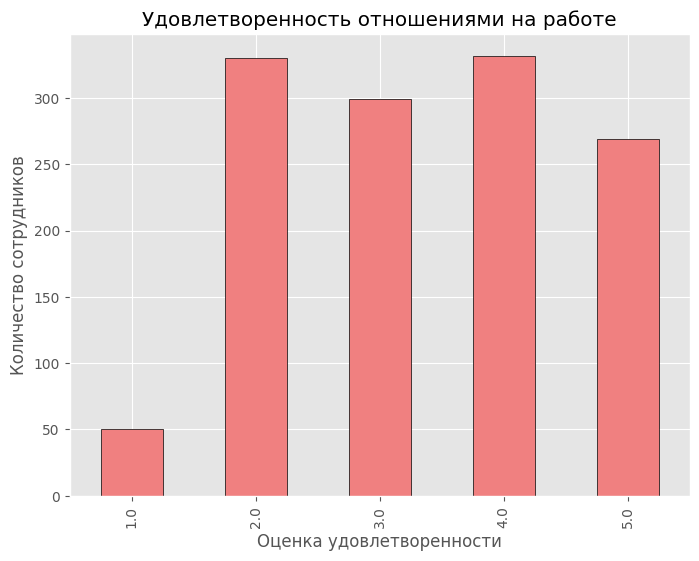

In [51]:
# Распределение по уровню удовлетворенности отношениями на работе
plt.figure(figsize=(8, 6))
df['RelationshipSatisfaction'].value_counts().sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Удовлетворенность отношениями на работе')
plt.xlabel('Оценка удовлетворенности')
plt.ylabel('Количество сотрудников')
plt.show()

Большая часть сотрудников оценивает удовлетворенность на уровне "2", "3" и "4":

Наибольшее количество сотрудников оценивают отношения на работе на уровне "2" (около 350 человек), что может указывать на некоторую неудовлетворенность отношениями на рабочем месте.
Оценки "3" и "4" также достаточно распространены (более 250 человек каждая), что свидетельствует о том, что многие сотрудники оценивают отношения на работе как "средние" или "хорошие".
Небольшая доля сотрудников с крайне низкой удовлетворенностью:

Оценка "1" (самый низкий уровень удовлетворенности) встречается реже (около 50 человек), что говорит о том, что совсем плохие отношения на работе — редкость.
Умеренное количество сотрудников с высокой удовлетворенностью:

Оценка "5" встречается реже, чем хотелось бы. Это может свидетельствовать о том, что не все сотрудники полностью удовлетворены взаимоотношениями на работе.

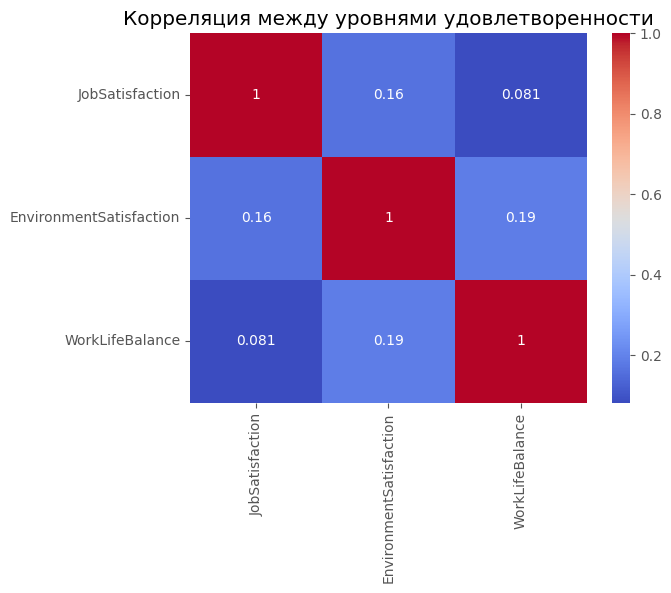

In [52]:
# Корреляционная матрица для удовлетворенности
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']
sns.heatmap(df[satisfaction_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между уровнями удовлетворенности')
plt.show()

In [53]:
df[satisfaction_cols].corr()

,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance
JobSatisfaction,1.000000,0.162945,0.080964
EnvironmentSatisfaction,0.162945,1.000000,0.187920
WorkLifeBalance,0.080964,0.187920,1.000000


Корреляция между удовлетворенностью работой и удовлетворенностью рабочей средой (JobSatisfaction и EnvironmentSatisfaction) составляет 0.1629. Это слабая положительная корреляция, что означает, что удовлетворенность рабочей средой немного связана с удовлетворенностью самой работой, но эта связь не очень сильная.

Корреляция между удовлетворенностью работой и балансом работы и личной жизни (JobSatisfaction и WorkLifeBalance) составляет 0.0809. Это очень слабая корреляция, что указывает на почти независимость этих двух факторов в данном наборе данных.

Корреляция между удовлетворенностью рабочей средой и балансом работы и личной жизни (EnvironmentSatisfaction и WorkLifeBalance) составляет 0.1879. Это также слабая положительная корреляция, что указывает на небольшую связь между этими двумя факторами.

Выводы:
Удовлетворенность рабочей средой и удовлетворенность работой связаны, но незначительно. Это говорит о том, что даже если сотрудник доволен рабочей средой, это не гарантирует его удовлетворенность самой работой и наоборот.
Баланс работы и личной жизни слабо связан как с удовлетворенностью работой, так и с удовлетворенностью рабочей средой. Это может означать, что для ваших сотрудников баланс работы и жизни не является решающим фактором для их общей удовлетворенности.

# 4. Анализ факторов, связанных с увольнениями

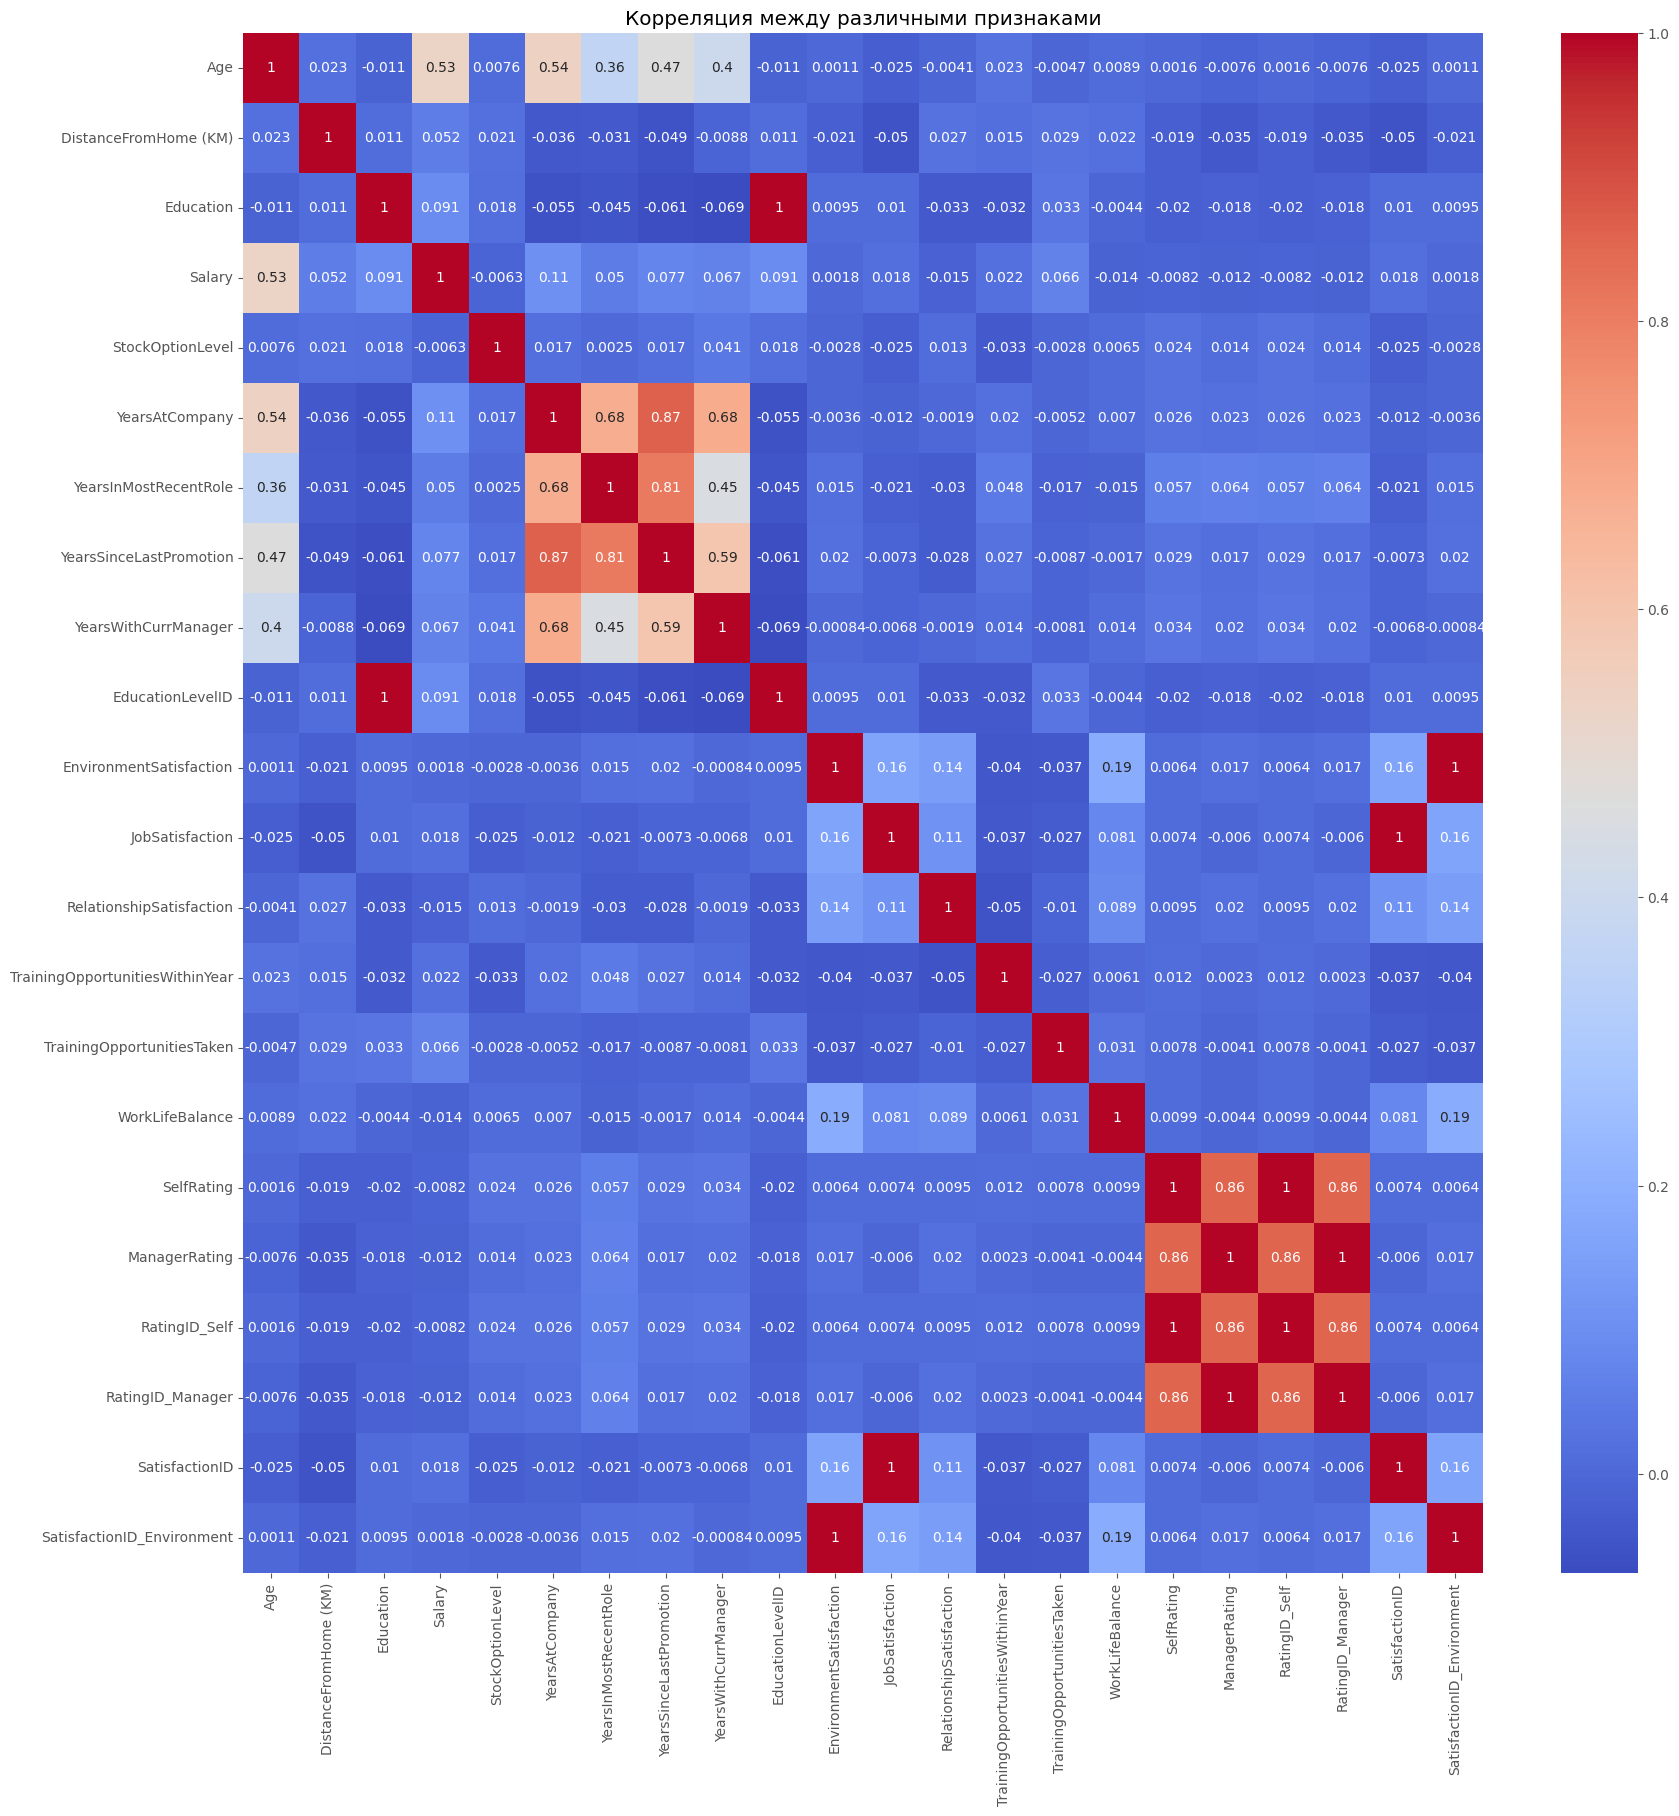

In [ ]:
# Корреляционный анализ только для числовых данных
plt.figure(figsize=(20, 20))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Фильтрация числовых данных
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между различными признаками')
plt.show()

Несколько ключевых наблюдений на основе этой корреляционной матрицы:

Сильная корреляция:

Между количеством лет в компании и количеством лет в самой последней роли: 0.86. Это логично, так как чем дольше человек работает в компании, тем дольше он, вероятно, остается в одной и той же роли.
Между самооценкой (SelfRating) и оценкой менеджера (ManagerRating): 0.86, что указывает на то, что самооценка сотрудников достаточно точно отражает мнение менеджеров о них.
Умеренная корреляция:

Между количеством лет в компании и количеством лет с текущим менеджером: 0.61.
Между количеством лет с момента последнего повышения и количеством лет в компании: 0.57.
Слабая или отсутствующая корреляция:

Большинство других признаков показывают слабую корреляцию друг с другом. Это может говорить о том, что данные достаточно разнообразны, и нет ярко выраженных линейных зависимостей между многими из них.

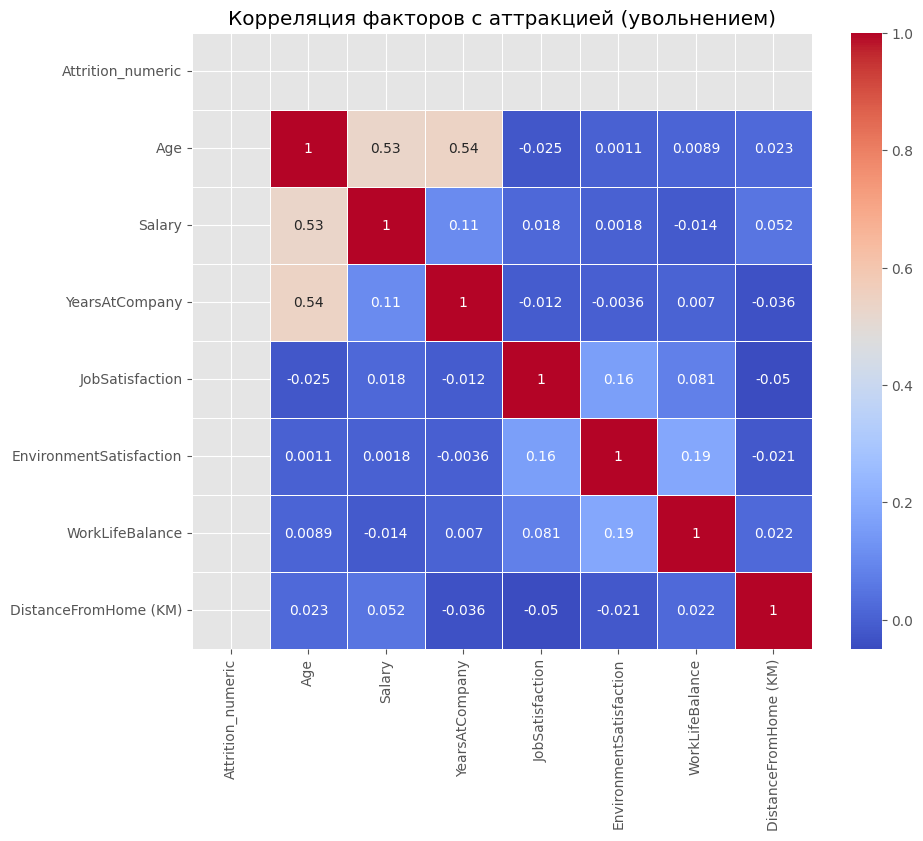

In [54]:
# Преобразуем колонку 'Attrition' в числовой формат (Да = 1, Нет = 0)
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Да' else 0)

# Корреляционная матрица для анализа влияния разных факторов на аттракцию
correlation_matrix = df[['Attrition_numeric', 'Age', 'Salary', 'YearsAtCompany', 'JobSatisfaction',
                         'EnvironmentSatisfaction', 'WorkLifeBalance', 'DistanceFromHome (KM)']].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция факторов с аттракцией (увольнением)')
plt.show()

Основные выводы:
Возраст и стаж работы:

Возраст (Age) имеет положительную корреляцию с аттракцией (0.53), что означает, что более возрастные сотрудники с большей вероятностью увольняются из компании.
Стаж работы в компании (YearsAtCompany) также показывает положительную корреляцию с аттракцией (0.54), что может свидетельствовать о том, что сотрудники, проработавшие долгое время, склонны покидать компанию.
Зарплата (Salary):

Корреляция между зарплатой и аттракцией (0.11) достаточно низкая, что указывает на слабую связь между уровнем заработной платы и вероятностью увольнения. Это может означать, что сотрудники не обязательно покидают компанию из-за низкой зарплаты.
Удовлетворенность:

Удовлетворенность работой (JobSatisfaction) и удовлетворенность рабочей средой (EnvironmentSatisfaction) показывают практически нулевую корреляцию с увольнениями (-0.025 и 0.0011 соответственно). Это говорит о том, что уровень удовлетворенности не сильно влияет на решение сотрудников покинуть компанию.
Баланс работы и личной жизни (WorkLifeBalance) также имеет слабую корреляцию с увольнением (0.0089).
Удаленность от дома (DistanceFromHome):

Корреляция между удаленностью от дома и аттракцией (0.023) очень низкая, что указывает на слабую связь между тем, как далеко сотрудник живет от работы, и его склонностью к увольнению.

## Анализ увольнений по отдельным факторам

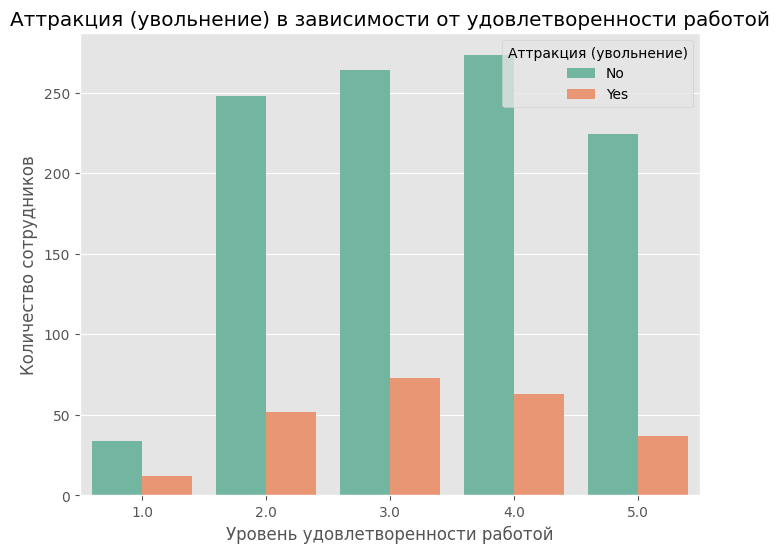

In [55]:
# Визуализация аттракции по уровню удовлетворенности работой
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='Set2')
plt.title('Аттракция (увольнение) в зависимости от удовлетворенности работой')
plt.xlabel('Уровень удовлетворенности работой')
plt.ylabel('Количество сотрудников')
plt.legend(title='Аттракция (увольнение)', loc='upper right')
plt.show()

Основные выводы:
Низкий уровень удовлетворенности (1-2):

Сотрудники с уровнем удовлетворенности "1" и "2" имеют более высокий процент увольнений по сравнению с другими уровнями. Это видно по увеличению доли сотрудников, которые покинули компанию (оранжевые столбцы).
Особенно заметно, что при уровне удовлетворенности "2" доля сотрудников, покинувших компанию, относительно высока.

Умеренный уровень удовлетворенности (3-4):

На уровнях удовлетворенности "3" и "4" количество сотрудников, покинувших компанию, также присутствует, но оно меньше по сравнению с сотрудниками, которые остались в компании.
Это указывает на то, что средний уровень удовлетворенности не является столь сильным фактором для увольнения, но тем не менее имеет значение.

Высокий уровень удовлетворенности (5):

Среди сотрудников, которые дали оценку удовлетворенности "5", доля увольнений значительно меньше по сравнению с теми, кто остался. Это говорит о том, что сотрудники, которые очень довольны своей работой, значительно реже покидают компанию.

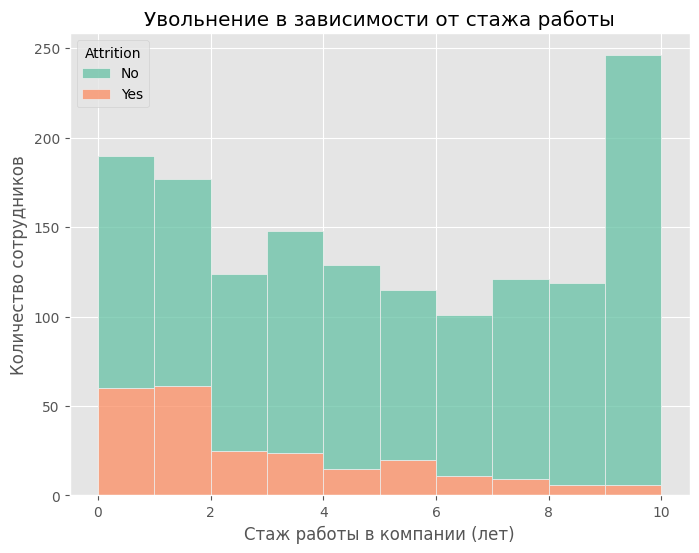

In [71]:
# Визуализация по стажу работы в компании
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', palette='Set2', bins=10)
plt.title('Увольнение в зависимости от стажа работы')
plt.xlabel('Стаж работы в компании (лет)')
plt.ylabel('Количество сотрудников')
plt.show()

Наибольшее количество увольнений среди сотрудников с небольшим стажем (0-2 года):

Большая часть увольнений происходит среди сотрудников с коротким стажем работы (0-2 года). Это может свидетельствовать о том, что новички или сотрудники с небольшим опытом в компании могут быть наиболее подвержены увольнениям, возможно, из-за трудностей с адаптацией или несоответствием ожиданий.
При стаже 1-2 года оранжевые столбцы (увольнения) значительно выделяются, что указывает на высокий уровень аттракции среди молодых сотрудников.
Снижение количества увольнений с увеличением стажа:

Увольнения постепенно уменьшаются по мере увеличения стажа сотрудников. Это можно объяснить тем, что сотрудники, проработавшие несколько лет (3-6 лет), лучше адаптировались к компании и, вероятно, более довольны условиями работы.
В группах с стажем работы от 3 до 6 лет видно, что количество сотрудников, остающихся в компании, значительно превышает количество уволившихся.
Сотрудники с 10-летним стажем практически не увольняются:

Интересно отметить, что сотрудники с 10-летним стажем практически не покидают компанию. Это может свидетельствовать о высокой приверженности и лояльности к компании среди сотрудников с длительным опытом работы.

Увольнения по зарплате

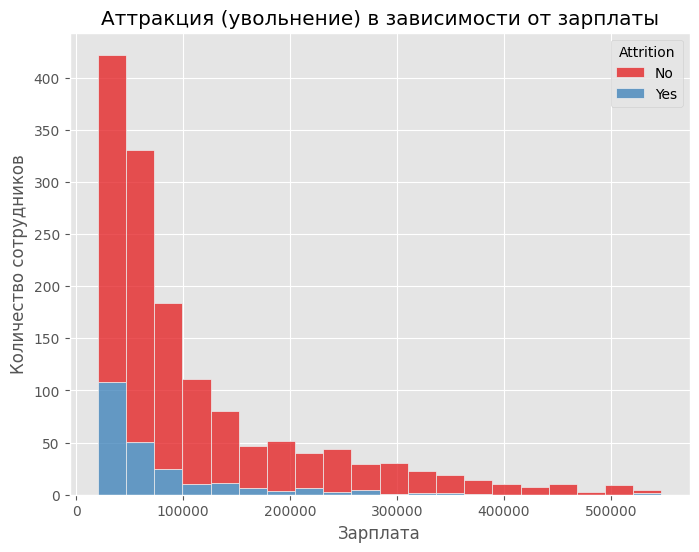

In [57]:
# Визуализация по уровню зарплаты
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Salary', hue='Attrition', multiple='stack', palette='Set1', bins=20)
plt.title('Увольнение) в зависимости от зарплаты')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

Наибольшая доля увольнений среди сотрудников с низкой зарплатой:

Наиболее значительная часть увольнений приходится на сотрудников с зарплатой менее 100 000. В этой категории заметна высокая доля увольнений (синие столбцы), особенно для зарплат ниже 50 000.
Это указывает на то, что низкая зарплата может быть одним из факторов, способствующих увольнению сотрудников.
Снижение увольнений с ростом зарплаты:

По мере увеличения уровня зарплаты количество увольнений уменьшается. В категории сотрудников с зарплатой выше 150 000 увольнений значительно меньше, и среди сотрудников с зарплатой выше 300 000 почти нет увольнений.
Это может свидетельствовать о том, что сотрудники с более высокой зарплатой реже покидают компанию, возможно из-за большей удовлетворенности своим финансовым положением.
Большая доля сотрудников с низкой зарплатой:

Большинство сотрудников в компании имеют зарплату ниже 100 000. Это видно по значительной концентрации красных и синих столбцов в этом диапазоне. Однако важно отметить, что и в этой группе есть много сотрудников, которые остаются в компании.

# 5. Сегментация пользователей


In [58]:
# Выбор релевантных столбцов для сегментации
features = ['Age', 'Salary', 'JobSatisfaction', 'YearsAtCompany', 'WorkLifeBalance', 'SelfRating', 'ManagerRating']

# Удаление строк с пропусками (если есть)
df_clean = df[features].dropna()

# Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

# Определение количества кластеров
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Создание нового столбца 'Cluster' только для тех строк, которые использовались в кластеризации
df.loc[df_clean.index, 'Cluster'] = kmeans.labels_

# Убедимся, что выбираем только числовые столбцы для группировки
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Анализ кластеров только по числовым данным
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

# Вывод результатов
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
               Age  DistanceFromHome (KM)  Education         Salary  \
Cluster                                                               
0.0      26.363309              23.690647   2.877698   83646.805755   
1.0      25.509506              21.479087   2.920152   78443.695817   
2.0      40.030899              22.542135   2.870787  203409.168539   
3.0      25.245431              21.932115   2.887728   77736.992167   

         StockOptionLevel  YearsAtCompany  YearsInMostRecentRole  \
Cluster                                                            
0.0              0.744604        4.618705               2.147482   
1.0              0.771863        4.193916               2.098859   
2.0              0.783708        7.542135               3.865169   
3.0              0.827676        4.112272               2.125326   

         YearsSinceLastPromotion  YearsWithCurrManager  EducationLevelID  ...  \
Cluster                                                           

Краткий анализ кластеров:

Кластер 0:

Возраст: В среднем 26 лет — это относительно молодые сотрудники.
Зарплата: Средняя годовая зарплата — 83 646.
Стаж в компании: В среднем около 4.6 лет.
Оценка производительности (ManagerRating): 2.66 — ниже средней.
Самооценка: 3.29.
Баланс работы и личной жизни: Оценка 3.26 — ниже среднего.
Уровень удовлетворенности: 2.37 — наименьший среди всех кластеров.
Заключение: Это молодые сотрудники с небольшим стажем, умеренной зарплатой и низкими показателями удовлетворенности и производительности.

Кластер 1:

Возраст: В среднем 25.5 лет.
Зарплата: Средняя зарплата — 78 443.
Стаж в компании: 4.2 года.
Оценка производительности (ManagerRating): 2.74 — чуть выше, чем в кластере 0.
Самооценка: 3.38 — тоже чуть выше, чем в кластере 0.
Баланс работы и личной жизни: 3.53 — выше среднего.
Уровень удовлетворенности: 4.51 — высокий.
Заключение: Молодые сотрудники с высокой удовлетворенностью, хорошим балансом работы и личной жизни, но относительно невысокой зарплатой и умеренной производительностью.

Кластер 2:

Возраст: В среднем 40 лет — это самая зрелая группа.
Зарплата: Самая высокая — 203 409.
Стаж в компании: 7.5 лет — больше, чем в других кластерах.
Оценка производительности (ManagerRating): 3.54 — выше средней.
Самооценка: 4.04.
Баланс работы и личной жизни: 3.37 — чуть ниже кластера 1, но выше, чем у кластера 0.
Уровень удовлетворенности: 3.39 — средний.
Заключение: Это опытные сотрудники с высокой зарплатой, хорошей производительностью, но с умеренной удовлетворенностью и балансом работы и личной жизни.

Кластер 3:

Возраст: В среднем 25.2 года.
Зарплата: Около 77 736.
Стаж в компании: В среднем 4.1 года.
Оценка производительности (ManagerRating): 4.41 — самая высокая среди всех кластеров.
Самооценка: 4.74 — самая высокая самооценка.
Баланс работы и личной жизни: 3.43.
Уровень удовлетворенности: 3.26 — ниже, чем в кластерах 1 и 2.
Заключение: Молодые сотрудники с самой высокой производительностью и самооценкой, но умеренной удовлетворенностью.

Выводы и рекомендации:

Кластер 0 требует внимания, так как сотрудники здесь имеют низкий уровень удовлетворенности и производительности. Возможно, стоит улучшить условия работы и предложить больше возможностей для обучения и карьерного роста.

Кластер 1 демонстрирует высокий уровень удовлетворенности при умеренной производительности. Для этих сотрудников можно разработать программу развития для повышения их производительности.

Кластер 2 — это опытные сотрудники с высокой зарплатой и хорошими показателями производительности, но их удовлетворенность на среднем уровне. Возможно, стоит предложить дополнительные бонусы или улучшение условий для удержания.

Кластер 3 показывает наивысшую производительность, но с умеренной удовлетворенностью. Важно поддерживать мотивацию и предотвратить выгорание.

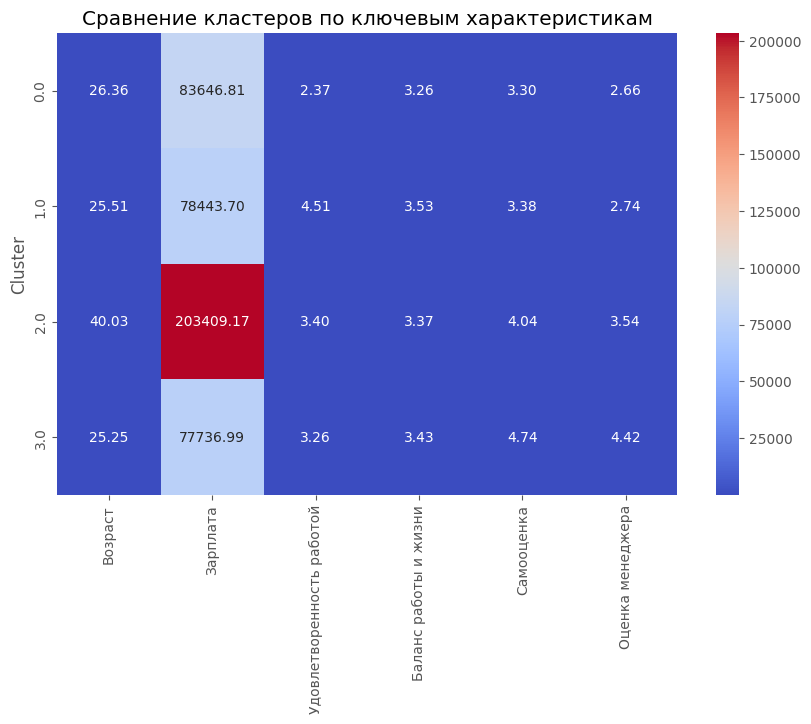

In [60]:
# Параметры для визуализации с русскими подписями
columns_to_plot_ru = ['Возраст', 'Зарплата', 'Удовлетворенность работой', 'Баланс работы и жизни', 'Самооценка', 'Оценка менеджера']

# Переименуем столбцы для отображения на русском языке
cluster_summary_ru = cluster_summary.rename(columns={
    'Age': 'Возраст',
    'Salary': 'Зарплата',
    'JobSatisfaction': 'Удовлетворенность работой',
    'WorkLifeBalance': 'Баланс работы и жизни',
    'SelfRating': 'Самооценка',
    'ManagerRating': 'Оценка менеджера'
})

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary_ru[columns_to_plot_ru], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Сравнение кластеров по ключевым характеристикам")
plt.show()


## Сегментация сотрудников по уровню удовлетворенности

Средние значения характеристик по кластерам:
         EnvironmentSatisfaction  JobSatisfaction  RelationshipSatisfaction  \
Cluster                                                                       
0                       2.511628         2.523256                  2.383721   
1                       3.909657         4.339564                  3.644860   
2                       3.914127         3.991690                  3.803324   
3                       4.232353         2.414706                  3.300000   

         WorkLifeBalance  
Cluster                   
0               2.573643  
1               4.514019  
2               2.385042  
3               4.047059  


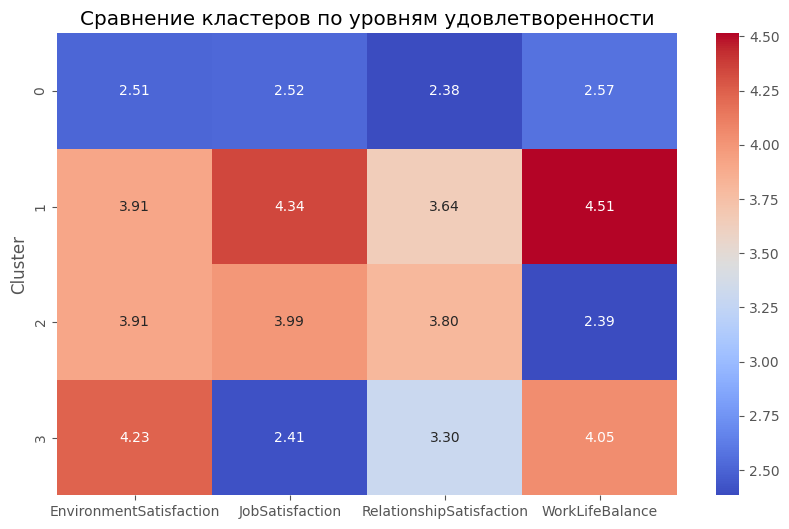

In [61]:
# Выбираем релевантные переменные для сегментации
features = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

# Удаляем строки с пропущенными значениями
df_clean = df[features].dropna()

# Шаг 2: Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

# Шаг 3: Применение KMeans для сегментации
kmeans = KMeans(n_clusters=4, random_state=42)  # Выбираем 4 кластера (можно изменить число)
df_clean['Cluster'] = kmeans.fit_predict(scaled_features)

# Шаг 4: Анализ кластеров
# Группируем данные по кластерам и выводим средние значения
cluster_summary = df_clean.groupby('Cluster').mean()

# Выводим результаты
print("Средние значения характеристик по кластерам:")
print(cluster_summary)

# Шаг 5: Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Сравнение кластеров по уровням удовлетворенности")
plt.show()

Краткий анализ по кластерам:

Кластер 0:

EnvironmentSatisfaction: 2.51
JobSatisfaction: 2.52
RelationshipSatisfaction: 2.38
WorkLifeBalance: 2.57
Интерпретация:

Сотрудники в этом кластере в целом имеют низкий уровень удовлетворенности по всем параметрам: рабочей средой, работой, взаимоотношениями и балансом работы и жизни.
Это может означать, что сотрудники в этом кластере более склонны к неудовлетворенности своей текущей ситуацией и, вероятно, требуют больше внимания со стороны HR, чтобы улучшить их условия работы.

Кластер 1:

EnvironmentSatisfaction: 3.91
JobSatisfaction: 4.34
RelationshipSatisfaction: 3.64
WorkLifeBalance: 4.51
Интерпретация:

Сотрудники в этом кластере демонстрируют высокий уровень удовлетворенности практически во всех аспектах.
Особенно заметна высокая удовлетворенность работой и балансом работы и жизни.
Эти сотрудники, вероятно, наиболее вовлечены в рабочий процесс и чувствуют хорошее сочетание между личной и рабочей жизнью.

Кластер 2:

EnvironmentSatisfaction: 3.91
JobSatisfaction: 3.99
RelationshipSatisfaction: 3.80
WorkLifeBalance: 2.39
Интерпретация:

Этот кластер демонстрирует высокий уровень удовлетворенности рабочей средой, работой и отношениями.
Однако баланс между работой и личной жизнью находится на довольно низком уровне.
Это может указывать на то, что сотрудники довольны самим рабочим процессом, но испытывают трудности с распределением времени между работой и личной жизнью. Это потенциальная зона для улучшений.

Кластер 3:

EnvironmentSatisfaction: 4.23
JobSatisfaction: 2.41
RelationshipSatisfaction: 3.30
WorkLifeBalance: 4.05
Интерпретация:

Сотрудники этого кластера довольны рабочей средой и балансом работы и жизни.
Однако у них очень низкий уровень удовлетворенности работой, что может говорить о несоответствии работы их ожиданиям или неинтересных задачах.
HR-стратегия для этой группы может быть направлена на улучшение их должностных обязанностей или предложений по развитию карьеры.


Рекомендации по каждому кластеру:

Кластер 0 (Низкая удовлетворенность):

Проведение опросов для более глубокого понимания проблем и выработки решений.
Возможно, улучшение условий работы, предоставление гибкого графика или поддержки баланса работы и личной жизни.

Кластер 1 (Высокая удовлетворенность):

Продолжение существующих инициатив для поддержания уровня удовлетворенности.
Признание и награждение сотрудников, чтобы поддерживать высокий уровень мотивации.

Кластер 2 (Низкий баланс работы и жизни):

Разработка программ, направленных на улучшение баланса работы и личной жизни.
Предоставление более гибких условий работы, сокращение сверхурочной нагрузки.

Кластер 3 (Низкая удовлетворенность работой):

Улучшение содержания работы сотрудников, предоставление более интересных задач и возможностей для роста.
Проведение обсуждений с сотрудниками, чтобы выяснить, что может быть улучшено в их текущей работе.

# Построение модели для предсказания увольнений

In [88]:
#Удаление строк с пропущенными значениями
df_clean = df.dropna()

# Преобразование целевой переменной 'Attrition' в числовой формат (Да/Нет -> 1/0)
label_encoder = LabelEncoder()
df_clean['Attrition'] = label_encoder.fit_transform(df_clean['Attrition'])

# Выбор признаков для модели
features = [
    'Age', 'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'EducationLevelID',
    'JobRole', 'MaritalStatus', 'Salary', 'StockOptionLevel', 'OverTime', 'YearsAtCompany',
    'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction',
    'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'TrainingOpportunitiesTaken'
]

# Кодирование категориальных переменных
df_encoded = pd.get_dummies(df_clean[features], drop_first=True)

# Определение целевой переменной
X = df_encoded
y = df_clean['Attrition']

# Шаг 3: Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Шаг 4: Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Шаг 5: Обучение моделей
# Модель 1: Логистическая регрессия
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Модель 2: Случайный лес
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Шаг 6: Предсказание и оценка моделей
# Логистическая регрессия
y_pred_log = log_model.predict(X_test)
print("Логистическая регрессия:")
print(f"Точность: {accuracy_score(y_test, y_pred_log):.2f}")
print("Отчет классификации:")
print(classification_report(y_test, y_pred_log))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_log))

# Случайный лес
y_pred_rf = rf_model.predict(X_test)
print("\nСлучайный лес:")
print(f"Точность: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Отчет классификации:")
print(classification_report(y_test, y_pred_rf))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_rf))

<ipython-input-88-a2f03ba1ed15>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Attrition'] = label_encoder.fit_transform(df_clean['Attrition'])


Логистическая регрессия:
Точность: 0.86
Отчет классификации:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       306
           1       0.74      0.47      0.58        78

    accuracy                           0.86       384
   macro avg       0.81      0.72      0.75       384
weighted avg       0.85      0.86      0.85       384

Матрица ошибок:
[[293  13]
 [ 41  37]]

Случайный лес:
Точность: 0.89
Отчет классификации:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       306
           1       0.93      0.47      0.63        78

    accuracy                           0.89       384
   macro avg       0.90      0.73      0.78       384
weighted avg       0.89      0.89      0.87       384

Матрица ошибок:
[[303   3]
 [ 41  37]]


In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [91]:
from sklearn.metrics import precision_recall_curve

y_probs = log_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Найдем порог, максимизирующий F1-score или Recall
best_threshold = thresholds[np.argmax(recall)]

In [92]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = xgb_model.predict(X_test)
print(f"Точность XGBoost: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(classification_report(y_test, y_pred_xgb))

Точность XGBoost: 0.86
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       306
           1       0.69      0.59      0.63        78

    accuracy                           0.86       384
   macro avg       0.79      0.76      0.77       384
weighted avg       0.86      0.86      0.86       384



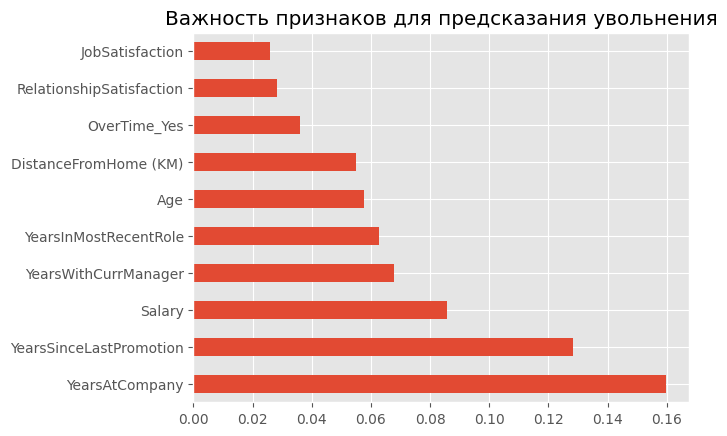

In [93]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Важность признаков для предсказания увольнения')
plt.show()

Наиболее Важные Признаки:

YearsAtCompany и YearsSinceLastPromotion:
Эти признаки являются наиболее важными для предсказания увольнения. Количество лет в компании (YearsAtCompany) говорит о том, что сотрудники с длительным стажем могут быть более склонны к увольнению, если не получают должного роста или улучшений в карьере.
Количество лет с момента последнего повышения (YearsSinceLastPromotion) также играет значительную роль, что свидетельствует о том, что сотрудники, которые долгое время не получают повышения, склонны к недовольству и увольнению.
Другие Важные Признаки:

Salary (Зарплата):
Зарплата также имеет значительную важность, что подтверждает предположение о том, что недостаточная оплата труда может способствовать увольнению. Сотрудники, которые не чувствуют, что их труд компенсируется адекватно, могут принять решение уйти.
YearsWithCurrManager:
Количество лет с текущим менеджером может указывать на динамику отношений сотрудника с менеджером. Возможно, сотрудники, которые долгое время работают с одним и тем же менеджером, теряют мотивацию, что ведет к увеличению вероятности увольнения.
Средневажные Признаки:

Age, DistanceFromHome (KM), и YearsInMostRecentRole:
Возраст и удаленность от дома (DistanceFromHome) также имеют определенную важность. Эти признаки могут указывать на то, что с возрастом или при значительном расстоянии до работы сотрудники могут чувствовать большую нагрузку и желание сменить работу.
Количество лет в текущей роли (YearsInMostRecentRole) может свидетельствовать о том, что сотрудники теряют интерес, если долго находятся на одной должности без изменений.
Наименее Важные Признаки:

OverTime_Yes, RelationshipSatisfaction, и JobSatisfaction:
Сверхурочная работа (OverTime) также влияет на вероятность увольнения, но не так сильно, как другие признаки. Это может означать, что не все сотрудники видят сверхурочные часы как основной фактор, влияющий на решение об увольнении.
Удовлетворенность работой и отношениями имеет низкую важность в сравнении с другими признаками, что может означать, что они менее значимо влияют на решение сотрудника покинуть компанию, по крайней мере, в рамках текущих данных.

In [94]:
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [95]:
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Вероятности для класса "1"
y_pred_adjusted = (y_probs >= 0.3).astype(int)
print(f"Точность при изменении порога: {accuracy_score(y_test, y_pred_adjusted):.2f}")
print(classification_report(y_test, y_pred_adjusted))

Точность при изменении порога: 0.86
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       306
           1       0.64      0.68      0.66        78

    accuracy                           0.86       384
   macro avg       0.78      0.79      0.78       384
weighted avg       0.86      0.86      0.86       384



Основные Улучшения:
После снижения порога модель стала лучше предсказывать увольнение сотрудников, что видно по улучшению Recall для класса "1" с 0.47 до 0.68. Это означает, что теперь модель улавливает больше случаев, когда сотрудник с высокой вероятностью собирается уйти.
F1-score также улучшился для увольняющихся сотрудников, что свидетельствует об улучшении баланса между Precision и Recall. Это делает модель более пригодной для задач, где важно улавливать как можно больше сотрудников с высоким риском увольнения.
Положительные Стороны:
Recall класса "1" улучшился, что означает, что модель теперь лучше "чувствует" увольняющихся сотрудников. Это важный шаг, так как основной целью модели является идентификация тех, кто может уйти, чтобы предпринять меры по их удержанию.
Сохранение точности модели на уровне 86% говорит о том, что изменение порога не привело к значительному ухудшению в других областях предсказаний, и все еще поддерживается хороший уровень общей точности.

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)
best_xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


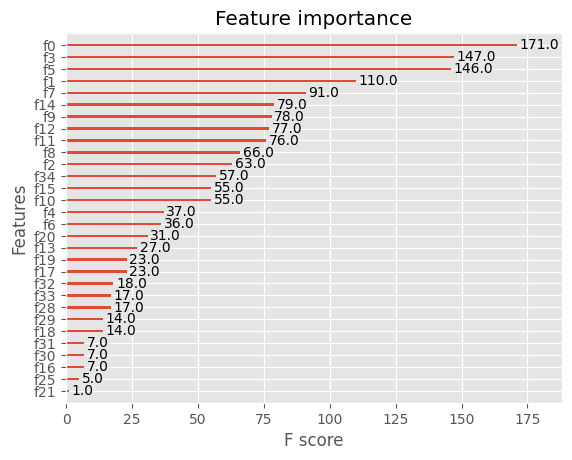

In [97]:
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()

Наиболее Важные Признаки (f0, f5, f1, f7 и так далее):

f0, f5 и f1: Эти признаки имеют самые высокие значения F score (171, 147 и 146 соответственно), что говорит о том, что они оказывают наибольшее влияние на предсказания модели. Признаки с высокой важностью означают, что они часто используются при разбиении узлов в деревьях, и, следовательно, они имеют более значительное влияние на конечный результат.
Важно идентифицировать, что представляют эти признаки в исходных данных. Например, если f0 — это YearsAtCompany, то понятно, что длительность работы в компании сильно влияет на склонность сотрудников к увольнению.
Средневажные Признаки (f14, f12, f11, f8 и так далее):

Эти признаки также оказывают значительное влияние на модель, но меньше, чем лидеры по F score.
Например, если f14 соответствует признаку Salary, то его важность указывает на то, что уровень зарплаты действительно играет роль в принятии сотрудником решения об увольнении.
Наименее Важные Признаки (f30, f18, f16, f21):

Эти признаки имеют самые низкие значения F score и, следовательно, оказывают небольшое влияние на предсказания модели.
Если среди этих признаков оказались такие, как RelationshipSatisfaction или JobSatisfaction, это может говорить о том, что они менее критичны для определения вероятности увольнения, по крайней мере в текущей выборке данных.

# Выводы

1. Возрастной и Гендерный Состав Сотрудников
Основная возрастная группа сотрудников находится в диапазоне от 20 до 30 лет с пиком на 25-26 годах, что указывает на преобладание молодых сотрудников. Возможно, компания активно нанимает специалистов начального уровня, либо существует высокая текучесть среди более возрастных сотрудников.
Меньшая доля сотрудников старше 35 лет и практически отсутствие сотрудников старше 50 лет может говорить о том, что компания привлекает в основном молодых специалистов. Это также может быть признаком выгорания или отсутствия карьерного роста для более возрастных сотрудников.
Примерное равенство полов (44.3% мужчин и 45.9% женщин) указывает на баланс гендерного состава. Наличие 8.4% небинарных сотрудников и 1.4% сотрудников, которые предпочли не указывать пол, подчеркивает инклюзивную политику компании.

2. Распределение Зарплат и Равенство
Средние зарплаты для мужчин, женщин и небинарных сотрудников практически равны, что говорит о равенстве возможностей в оплате труда. Это свидетельствует о наличии равных условий для сотрудников вне зависимости от гендерной принадлежности.
Сотрудники, которые предпочли не указывать пол, имеют более высокие зарплаты, что может свидетельствовать о нахождении на более высоких должностях.

3. Этническое Разнообразие
Преобладание белых сотрудников (более 800) и значительное количество афроамериканцев и сотрудников смешанных этнических групп указывает на преобладающую группу и наличие этнического разнообразия в компании.
Меньшая представленность сотрудников азиатского происхождения и других этнических категорий может потребовать дополнительных усилий по улучшению разнообразия и равенства в компании.

4. Семейное Положение и Зарплаты
Однородность зарплат по семейному положению говорит о том, что семейное положение не является фактором, влияющим на оплату труда.
Незначительные различия в зарплатах между женатыми, разведенными и одинокими сотрудниками указывают на возможную связь с опытом работы или позицией в компании.

5. Влияние Расстояния до Работы на Зарплату
Отсутствие зависимости между зарплатой и расстоянием до работы указывает на то, что местоположение сотрудника не оказывает значимого влияния на его заработную плату.

6. Взаимосвязь Возраста и Стажей Работы
Прямая зависимость стажа от возраста является логичной и ожидаемой. Однако сотрудники в возрасте 30-40 лет имеют разные уровни стажа, что говорит о постоянном притоке новых сотрудников и долгосрочных сотрудниках.

7. Обучение и Карьерный Рост
Малая вариативность данных по обучению говорит о том, что программа обучения либо стандартизирована, либо недостаточно развита. Это ограничивает возможности для карьерного роста.

8. Работа Сверхурочно и Текучесть Кадров
Сотрудники, не работающие сверхурочно, имеют меньшую текучесть, тогда как работа сверхурочно способствует увольнениям. Это может быть связано с выгоранием и стрессом.
Рекомендация: Разработать меры по снижению необходимости сверхурочной работы и предложить компенсации или гибкий график для уменьшения стресса.

9. Сегментация Сотрудников по Отделам и Регионам
Преобладание сотрудников в отделе Technology указывает на фокус компании на технологическом секторе. Отдел Sales меньше по численности, но является важным для поддержания доходов.
Распределение по регионам: Большинство сотрудников находятся в одном штате, что может указывать на локальный фокус компании.

10. Анализ Удовлетворенности Рабочей Средой и Производительности
Удовлетворенность рабочей средой увеличивается до определенного уровня производительности, но затем снижается. Это может быть связано с выгоранием сотрудников, получающих максимальные оценки.
Отсутствие роста удовлетворенности отношениями на высоких уровнях производительности может говорить о недостатке внимания к созданию командной атмосферы, особенно в условиях высокого давления.

11. Анализ Важности Признаков для Увольнения
Самые важные признаки для предсказания увольнения: количество лет в компании, время с момента последнего повышения и зарплата. Это указывает на необходимость частого пересмотра карьерных возможностей и адекватной компенсации для снижения текучести.
Отсутствие карьеры и продвижений является значительным фактором риска для увольнения, что подтверждается анализом важности признаков.

12. Модели Предсказания Увольнений
Модель XGBoost с измененным порогом показала улучшение в Recall для увольняющихся сотрудников, что позволило лучше предсказывать текучесть. Это полезно для своевременных мер по удержанию.
Использование важности признаков помогло глубже понять ключевые факторы, влияющие на текучесть, что позволяет разрабатывать целевые стратегии удержания.


Общие Рекомендации:

Развитие Карьерного Роста:
Предоставление более частых возможностей для повышения, особенно для сотрудников, которые долго остаются на одной позиции, поможет снизить текучесть кадров.

Снижение Сверхурочной Работы:
Оптимизация процессов и введение компенсаций за сверхурочные часы помогут снизить негативное влияние сверхурочной работы на текучесть кадров.

Поддержка Инклюзивности:
Продолжение и усиление усилий по обеспечению равных возможностей для всех категорий сотрудников, включая небинарных сотрудников, поддержит культуру инклюзивности.

Работа с Менеджерами:
Повышение качества работы менеджеров через обучение и поддержку их навыков взаимодействия поможет улучшить удовлетворенность сотрудников отношениями.

Развитие Отделов:
Поддержка отдела Technology для повышения производительности и ресурсов, а также проверка обеспеченности отдела Sales для достижения целей компании.


Заключение:
Анализ данных показал, что компания имеет молодую кадровую структуру с высокой текучестью среди сотрудников, работающих сверхурочно или с недостаточными карьерными возможностями. Модель XGBoost помогла выявить ключевые факторы увольнений, такие как длительный период без повышения и недостаточный уровень зарплаты. Чтобы улучшить удержание сотрудников и поддержать инклюзивную рабочую среду, компании рекомендуется сосредоточиться на развитии карьерных возможностей, уменьшении переработок и поддержке менеджеров в создании положительной рабочей атмосферы.